<center><h1>Projet IA - Fake News & Deep Fake</h1></center>

<center><h1>Présenté par Shabboo ALEAGHA & Ophélie ENGASSER</h1></center>

<center><h2>M2-IADS-EL - Mai 2024</h2></center>

# Notebook #1. Data cleaning + EDA + pre-processing + vectorizing + machine learning models

# Importation des librairies

In [1]:
# pour l'exploration des données
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from wordcloud import WordCloud

# pour le nettoyage
import re
from langdetect import detect

# pour le traitement linguistique des données
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
import string

# pour la préparation des données
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# pour l'extraction des caractéristiques et la vectorisation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# pour la modélisation
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier

# pour l'optimisation
from sklearn.model_selection import GridSearchCV

# pour l'évaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# pour l'exportation-importation des fonctions et modèles
import pickle
from joblib import dump
from joblib import load

# pour ignorer les warnings
import warnings
warnings.filterwarnings("ignore")

# Ouverture et exploration du dataset

Le dataset sur lequel nous allons travailler a été fourni en open source par les auteurs Yang et al. (2018) dans leur étude sur la détection des fake news à partir d'une architecture de réseaux de neurones multimodaux. L'originalité de ce dataset, comparativement à ceux qui ne répertorient que des textes, est l'attention que les auteurs ont portée à l'exhaustivité des features, dans un but exploratoire. Ce dataset a été réutilisé et comparé avec d'autres, notamment par Hu et al. (2022). Le dataset comporte un total de 20015 lignes, chacune représentant un article. Les articles labellisés Fake proviennent de Kaggle, et les articles labellisés Real proviennent des journaux New York Times et Washington Post.

In [5]:
path_pc = 'C:/Users/Engasser Ophélie/Desktop/ProjetIA/data_raw.csv'
df = pd.read_csv(path_pc)
df

Unnamed: 0.1  Unnamed: 0                          author  comments  \
0                 1         NaN                JEREMY W. PETERS       0.0   
1                 2         NaN                      STEVE EDER       0.0   
2                 3         NaN   MAGGIE HABERMAN ASHLEY PARKER       0.0   
3                 4         NaN  NELSON D. SCHWARTZ SUI-LEE WEE       0.0   
4                 5         NaN                 MAGGIE HABERMAN       0.0   
...             ...         ...                             ...       ...   
20010         20011      2316.0                        noauthor       NaN   
20011         20012      3262.0                        noauthor       NaN   
20012         20013      4490.0                        noauthor       NaN   
20013         20014      4021.0                        noauthor       NaN   
20014         20015      4330.0                        noauthor       NaN   

         country              crawled  domain_rank   id language  likes  ...  \
0             US  2017-03-14 08:25:04            0  3.0  english    0.0  ...   
1             US  2017-03-14 08:25:36            0  4.0  english    0.0  ...   
2             US  2017-03-14 08:25:36            0  5.0  english    0.0  ...   
3             US  2017-03-14 08:25:36            0  6.0  english    0.0  ...   
4             US  2017-03-14 08:25:37            0  7.0  english    0.0  ...   
...          ...                  ...          ...  ...      ...    ...  ...   
20010  nocountry                  NaN            0  NaN      NaN    NaN  ...   
20011  nocountry                  NaN            0  NaN      NaN    NaN  ...   
20012  nocountry                  NaN            0  NaN      NaN    NaN  ...   
20013  nocountry                  NaN            0  NaN      NaN    NaN  ...   
20014  nocountry                  NaN            0  NaN      NaN    NaN  ...   

      fear  joy  sadness surprise  trust  negative positive  first_all  \
0        6   20        5       14     30        14       52        409   
1        4    4        4        5      9         8       15        145   
2        8   15        8        6     26        15       34        440   
3       10   10       10        6     32        24       43        592   
4        3    6        2        4     14         4       25        223   
...    ...  ...      ...      ...    ...       ...      ...        ...   
20010    2    6        2        0     14         8       13        128   
20011    7    8        7        5     13        14       21        135   
20012    8    4        4        4     23         9       21        284   
20013   17   21        9        9     42        26       62        531   
20014   12    9        5       15     17        16       25        301   

      second_all third_all  
0            150        45  
1             38        28  
2            168        68  
3            136        71  
4             82        28  
...          ...       ...  
20010         27        26  
20011         46        19  
20012         67        22  
20013        116        61  
20014        116        29  

[20015 rows x 54 columns]

In [ ]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'author', 'comments', 'country',
       'crawled', 'domain_rank', 'id', 'language', 'likes', 'main_img_url',
       'ord_in_thread', 'participants_count', 'published', 'replies_count',
       'shares', 'site_url', 'spam_score', 'text', 'thread_title', 'title',
       'type', 'uuid', 'caps_title', 'caps_thread', 'caps_text', 'title_len',
       'thread_len', 'text_len', 'excl_title', 'excl_thread', 'excl_text',
       'first_title', 'first_thread', 'first_text', 'second_title',
       'second_thread', 'second_text', 'third_title', 'third_thread',
       'third_text', 'anger', 'anticipation', 'disgust', 'fear', 'joy',
       'sadness', 'surprise', 'trust', 'negative', 'positive', 'first_all',
       'second_all', 'third_all'],
      dtype='object')

In [ ]:
df.shape

(20015, 54)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20015 entries, 0 to 20014
Data columns (total 54 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.1        20015 non-null  int64  
 1   Unnamed: 0          3171 non-null   float64
 2   author              20015 non-null  object 
 3   comments            16844 non-null  float64
 4   country             20015 non-null  object 
 5   crawled             16844 non-null  object 
 6   domain_rank         20015 non-null  int64  
 7   id                  4903 non-null   float64
 8   language            16844 non-null  object 
 9   likes               16844 non-null  float64
 10  main_img_url        20015 non-null  object 
 11  ord_in_thread       16844 non-null  float64
 12  participants_count  16844 non-null  float64
 13  published           13514 non-null  object 
 14  replies_count       16844 non-null  float64
 15  shares              16844 non-null  float64
 16  site

In [ ]:
df.isna().sum()

Unnamed: 0.1              0
Unnamed: 0            16844
author                    0
comments               3171
country                   0
crawled                3171
domain_rank               0
id                    15112
language               3171
likes                  3171
main_img_url              0
ord_in_thread          3171
participants_count     3171
published              6501
replies_count          3171
shares                 3171
site_url               3171
spam_score             3171
text                      0
thread_title              0
title                     0
type                      0
uuid                   3171
caps_title                0
caps_thread               0
caps_text                 0
title_len                 0
thread_len                0
text_len                  0
excl_title                0
excl_thread               0
excl_text                 0
first_title               0
first_thread              0
first_text                0
second_title        

La colonne 'Type' correspond à la target.

In [ ]:
df['type'].unique()

array(['real', 'fake'], dtype=object)

In [ ]:
df['type'].value_counts(normalize=True).round(2) * 100

type
fake    60.0
real    40.0
Name: proportion, dtype: float64

In [ ]:
df['country'].unique()

array(['US', 'CO', 'DE', 'GB', 'CA', 'AU', 'FR', 'EU', 'NL', 'LI', 'SG',
       'ME', 'TV', 'ES', 'RU', 'IN', 'nocountry', 'EE', 'SE', 'ZA', 'IS',
       'BG', 'IR', 'CH'], dtype=object)

# Nettoyage

Supprimons les colonnes inutiles.

In [4]:
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'uuid'], axis=1)

In [5]:
df.columns

Index(['author', 'comments', 'country', 'crawled', 'domain_rank', 'language',
       'likes', 'main_img_url', 'ord_in_thread', 'participants_count',
       'published', 'replies_count', 'shares', 'site_url', 'spam_score',
       'text', 'thread_title', 'title', 'type', 'caps_title', 'caps_thread',
       'caps_text', 'title_len', 'thread_len', 'text_len', 'excl_title',
       'excl_thread', 'excl_text', 'first_title', 'first_thread', 'first_text',
       'second_title', 'second_thread', 'second_text', 'third_title',
       'third_thread', 'third_text', 'anger', 'anticipation', 'disgust',
       'fear', 'joy', 'sadness', 'surprise', 'trust', 'negative', 'positive',
       'first_all', 'second_all', 'third_all'],
      dtype='object')

In [6]:
df['title']

0        At Donald Trump<U+2019>s Properties, a Showcas...
1        Trump Foundation Tells New York It Has Stopped...
2        Donald Trump Prepares for White House Move, bu...
3        Luring Chinese Investors With Trump<U+2019>s N...
4        Melania and Barron Trump Won<U+2019>t Immediat...
                               ...                        
20010    Alabama Lawmaker: Same-Sex Couples Don<U+2019>...
20011    GOP Senator David Perdue Jokes About Praying f...
20012    State Department says it can't find emails fro...
20013    In Ethiopia, Obama seeks progress on peace, se...
20014    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: title, Length: 20015, dtype: object

In [8]:
# nettoyage des balises de la colonne 'title' grâce aux regex
df['title'] = df['title'].apply(lambda x: re.sub('<[^<]+?>|<U\+2019>', '', x))
df['title']

0        At Donald Trumps Properties, a Showcase for a ...
1        Trump Foundation Tells New York It Has Stopped...
2        Donald Trump Prepares for White House Move, bu...
3        Luring Chinese Investors With Trumps Name, and...
4        Melania and Barron Trump Wont Immediately Move...
                               ...                        
20010    Alabama Lawmaker: Same-Sex Couples Dont Deserv...
20011    GOP Senator David Perdue Jokes About Praying f...
20012    State Department says it can't find emails fro...
20013    In Ethiopia, Obama seeks progress on peace, se...
20014    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: title, Length: 20015, dtype: object

Nettoyage de la colonne 'text', colonne principale qui servira à alimenter nos modèles. Ce nettoyage a pour objectif de supprimer les éléments non signifiants, et ainsi de réduire la dimensionnalité des données.

In [ ]:
df['text'][0]

"They stood in line at Trump Tower, sometimes up to half an hour, handing over their cash for mementos of the president-elect: mini, gold-wrapped chocolate bricks stamped <U+201C>Trump.<U+201D> Trump monogrammed sweaters, towels and glassware. Trump cologne. <U+201C>I bought it for my two sons,<U+201D> said Shanon Loggins, 47, of Lufkin, Tex., showing off a golden shopping bag embossed with the Trump crest that carried two bottles of Success by Trump, a fragrance for men. <U+201C>They need to be successful,<U+201D> she explained. Business is good for Donald J. Trump . People are flocking to his Midtown Manhattan skyscraper, dining in his restaurants and buying his wares. Reporters are fastidiously chronicling the comings and goings of his transition team , his self-branded properties providing the backdrop for television live shots. Mr. Trump has taken the staid task of preparing to assume the presidency and turned it into an exercise in conspicuous self-promotion and carefully choreog

In [9]:
# fonction de nettoyage de la colonne 'text'

def clean_text(text):

    # suppression des balises HTML
    text = re.sub('<[^<]+?>', '', text)
    
    # suppression des fins d'articles inutiles
    text = re.sub(r'A version of this article appears in print.*$', '', text)
    text = re.sub(r'Get politics and Washington news updates via Facebook , Twitter and in the Morning Briefing newsletter', '', text)
    
    # suppression des phrases commençant par 'Write to' (référence à l'auteur)
    text = re.sub(r'Write to.*$', '', text)
    
    # suppression des occurrences de 'WSJ' (mots vides)
    text = re.sub(r'\bWSJ\b', '', text)
    
    # suppression des phrases contenant des adresses e-mail
    email_sentence_regex = r'.*?\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b.*?[.!?]'
    text = re.sub(email_sentence_regex, '', text)
    
    return text

In [10]:
# application de la fonction sur la colonne
df['text'] = df['text'].apply(clean_text)

In [51]:
# vérification -> OK
df['text'][0]

'They stood in line at Trump Tower, sometimes up to half an hour, handing over their cash for mementos of the president-elect: mini, gold-wrapped chocolate bricks stamped Trump. Trump monogrammed sweaters, towels and glassware. Trump cologne. I bought it for my two sons, said Shanon Loggins, 47, of Lufkin, Tex., showing off a golden shopping bag embossed with the Trump crest that carried two bottles of Success by Trump, a fragrance for men. They need to be successful, she explained. Business is good for Donald J. Trump . People are flocking to his Midtown Manhattan skyscraper, dining in his restaurants and buying his wares. Reporters are fastidiously chronicling the comings and goings of his transition team , his self-branded properties providing the backdrop for television live shots. Mr. Trump has taken the staid task of preparing to assume the presidency and turned it into an exercise in conspicuous self-promotion and carefully choreographed branding. But as the president-elect make

Explorons la colonne langage pour vérifier quels articles sont en anglais.

In [12]:
df['language'].unique()

array(['english', 'german', 'french', 'spanish', 'russian', 'greek',
       'finnish', 'portuguese', 'arabic', 'dutch', 'italian', 'turkish',
       'ignore', 'norwegian', 'chinese', 'polish', nan], dtype=object)

In [13]:
df['language'].value_counts()

language
english       16252
russian         203
spanish         172
german          111
french           37
arabic           22
portuguese       11
turkish          10
italian           9
greek             4
ignore            4
dutch             3
norwegian         3
finnish           1
chinese           1
polish            1
Name: count, dtype: int64

Il va nous falloir supprimer les articles qui ne sont pas en anglais. Parmi les 3171 valeurs manquantes de la colonne 'language' nous allons utiliser la librairie langdetect qui détecte la langue et supprimer les articles qui ne sont pas en anglais.

In [14]:
nan_language = df[df['language'].isnull()]
len(nan_language)

3171

In [15]:
# fonction qui détecte les valeurs manquantes de la colonne et leur assigne une langue en analysant la colonne 'text'

def detect_language(df, text_col, lang_col):

    # masque booléen pour sélectionner les lignes avec une valeur manquante dans la colonne de langue
    nan_language = df[lang_col].isnull()

    # détection de langue aux textes avec une valeur manquante dans la colonne de langue
    langues_detectees = df[nan_language][text_col].apply(lambda x: detect(x) if pd.notnull(x) else None)

    # mise à jour de la colonne de langue avec les résultats de la détection de langue
    df.loc[nan_language, lang_col] = langues_detectees

In [ ]:
# application
detect_language(df, 'text', 'language')

In [16]:
df[['language', 'title']][df['language'] == 'en'].head(10)

language                                              title
16844       en        Kerry to go to Paris in gesture of sympathy
16845       en   The Battle of New York: Why This Primary Matters
16846       en                     Britains Schindler Dies at 106
16847       en  Fact check: Trump and Clinton at the 'commande...
16848       en  Iran reportedly makes new push for uranium con...
16849       en  With all three Clintons in Iowa, a glimpse at ...
16850       en  Donald Trumps Shockingly Weak Delegate Game So...
16851       en                   Trump takes on Cruz, but lightly
16852       en                         How women lead differently
16853       en  What's in that Iran bill that Obama doesn't like?

In [17]:
df['language'] = df['language'].replace('en', 'english')
df['language'].unique()

array(['english', 'german', 'french', 'spanish', 'russian', 'greek',
       'finnish', 'portuguese', 'arabic', 'dutch', 'italian', 'turkish',
       'ignore', 'norwegian', 'chinese', 'polish'], dtype=object)

Supprimons les lignes dont le langage n'est pas l'anglais.

In [18]:
df = df[df['language'] == 'english']

In [19]:
df['language'].unique()

array(['english'], dtype=object)

In [20]:
df.shape

(19423, 50)

In [21]:
df['type'].value_counts(normalize=True).round(2) * 100

type
fake    58.0
real    42.0
Name: proportion, dtype: float64

Avec cette suppression, le dataset reste désequilibré mais moins qu'avant.

Il faut reset les index pour éviter les warnings.

In [22]:
df = df.reset_index()

# EDA

Le dataset comporte de nombreuses colonnes destinées à l'EDA, nous offrant la possibilité de comprendre certaines caractéristiques explicites dans la structure des textes, ainsi que certaines différences explicites entre les articles Real et Fake. Explorons quelques une de ces caractéristiques, notamment la longueur des textes, la fréquence des mots, les éléments non verbaux des phrases (lettres capitales, ponctuation), ainsi que les sentiments exprimés.

In [23]:
df.columns

Index(['index', 'author', 'comments', 'country', 'crawled', 'domain_rank',
       'language', 'likes', 'main_img_url', 'ord_in_thread',
       'participants_count', 'published', 'replies_count', 'shares',
       'site_url', 'spam_score', 'text', 'thread_title', 'title', 'type',
       'caps_title', 'caps_thread', 'caps_text', 'title_len', 'thread_len',
       'text_len', 'excl_title', 'excl_thread', 'excl_text', 'first_title',
       'first_thread', 'first_text', 'second_title', 'second_thread',
       'second_text', 'third_title', 'third_thread', 'third_text', 'anger',
       'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise',
       'trust', 'negative', 'positive', 'first_all', 'second_all',
       'third_all'],
      dtype='object')

Tout d'abord, explorons la longueur des textes en nombre de caractères, information que nous pouvons trouver dans les colonnes text_len et title_len.

In [24]:
df['text_len'].head(10)

0    6489
1    2163
2    6239
3    7894
4    2979
5    5016
6    2031
7    7626
8    8641
9    3357
Name: text_len, dtype: int64

In [25]:
print(df['text_len'].max(), df['text_len'].min(), df['title_len'].max(), df['title_len'].min())

134206 1 456 1


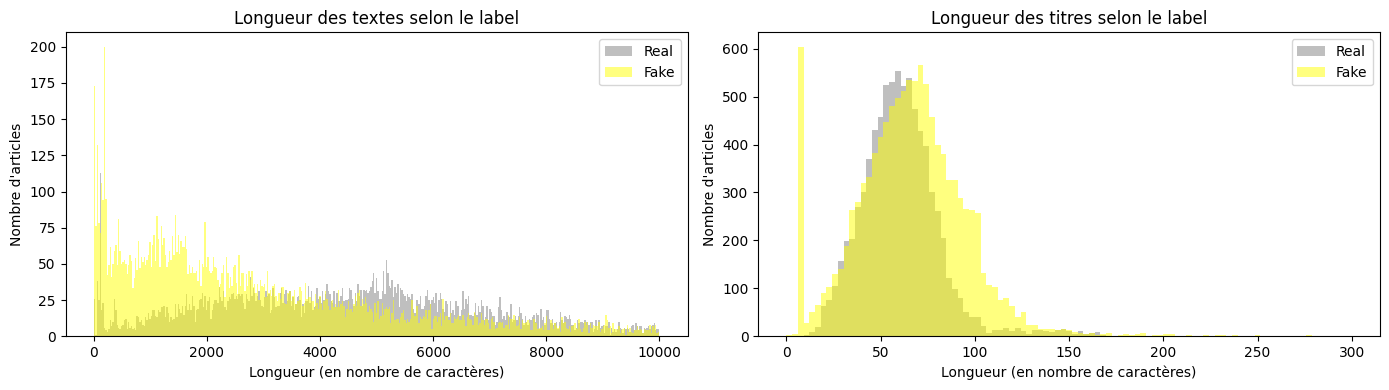

In [26]:
# visualisation de la longueur des textes selon le label

# création de deux sous-graphiques côte à côte
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# paramètres communs pour les deux graphiques
bins_text = np.linspace(0, 10000, 400)
bins_title = np.linspace(0, 300, 100)
alpha = 0.5
colors = ['grey', 'yellow']

# premier graphique pour les longueurs de texte
axs[0].hist(df[df['type'] == 'real']['text_len'], bins_text, alpha=alpha, label='Real', color=colors[0])
axs[0].hist(df[df['type'] == 'fake']['text_len'], bins_text, alpha=alpha, label='Fake', color=colors[1])
axs[0].legend(loc="upper right")
axs[0].set_title('Longueur des textes selon le label')
axs[0].set_xlabel('Longueur (en nombre de caractères)')
axs[0].set_ylabel('Nombre d\'articles')

# deuxième graphique pour les longueurs de titre
axs[1].hist(df[df['type'] == 'real']['title_len'], bins_title, alpha=alpha, label='Real', color=colors[0])
axs[1].hist(df[df['type'] == 'fake']['title_len'], bins_title, alpha=alpha, label='Fake', color=colors[1])
axs[1].legend(loc="upper right")
axs[1].set_title('Longueur des titres selon le label')
axs[1].set_xlabel('Longueur (en nombre de caractères)')
axs[1].set_ylabel('Nombre d\'articles')

# affichage des graphiques
plt.tight_layout()
plt.show()

Les articles Real ont une distribution plus aplatie, étant représentés par une longueur variable, alors que les Fake sont plus nombreux à être plus courts. Les titres des deux classes sont répartis davantage sous forme gaussienne, avec toutefois un léger décalage de la courbe des Fake vers la droite, suggérant plus de longueurs plus importantes.

Visualisons à présent les mots les plus représentés dans les différents corpus, sur un nuage de mots. Pour cela, il faut télécharger le corpus 'stopwords' afin de définir les stopwords en anglais.

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Engasser
[nltk_data]     Ophélie\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [27]:
stopwords_cloud = nltk.corpus.stopwords.words('english')

In [28]:
len(stopwords_cloud)

179

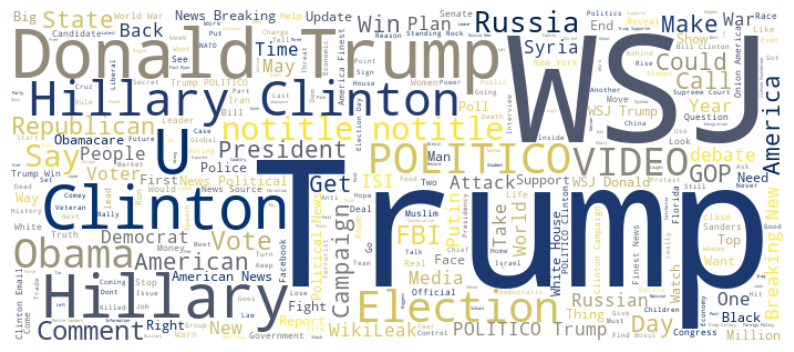

In [29]:
# nuage de mots à partir des titres
titles = ' '.join(title for title in df['title'])
wordcloud = WordCloud(stopwords = stopwords_cloud, background_color='white', max_words=300, width=700, height=300, colormap='cividis').generate(titles)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

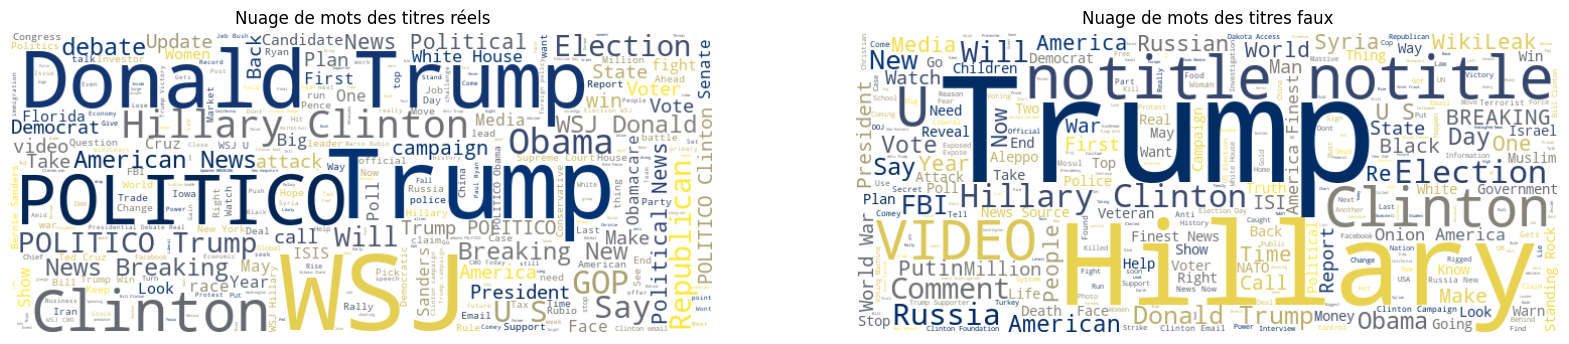

In [30]:
# nuage de mots selon le type real or fake
real_titles = df[df['type'] == 'real']['title']
fake_titles = df[df['type'] == 'fake']['title']

# concaténation des titres en une seule chaîne de caractères
real_titles_combined = ' '.join(title for title in real_titles)
fake_titles_combined = ' '.join(title for title in fake_titles)

# nuages de mots
wordcloud_real = WordCloud(background_color='white', max_words=300, width=700, height=300, colormap='cividis').generate(real_titles_combined)
wordcloud_fake = WordCloud(background_color='white', max_words=300, width=700, height=300, colormap='cividis').generate(fake_titles_combined)

# affichage
fig, axes = plt.subplots(1, 2, figsize=(20, 15))
axes[0].imshow(wordcloud_real, interpolation='bilinear')
axes[0].set_title('Nuage de mots des titres réels')
axes[0].axis("off")
axes[1].imshow(wordcloud_fake, interpolation='bilinear')
axes[1].set_title('Nuage de mots des titres faux')
axes[1].axis("off")
plt.show()

Si l'on compare les 2 nuages de points, on observe que les fake ont souvent aucun titre, ce que l'on voit par la grandeur des termes 'notitle' (les auteurs du dataset ont remplacé les NaN des titres par 'notitle'). Dans le corpus fake, certains mots en majuscules comme VIDEO, pourraient avoir pour but d'attirer l'attention du lecteur.

On observe également que le corpus réel semble contenir davantage de verbes, notamment des verbes d'actions (say, vote, watch, rise...)

Explorons à présent les éléments non-verbaux présents dans les textes (lettres capitales, ponctuation d'exclamation), afin de voir si notre insight précédent se valide. Nous trouvons cette information dans les colonnes caps_title, caps_text, excl_title, excl_text.

In [31]:
df.columns

Index(['index', 'author', 'comments', 'country', 'crawled', 'domain_rank',
       'language', 'likes', 'main_img_url', 'ord_in_thread',
       'participants_count', 'published', 'replies_count', 'shares',
       'site_url', 'spam_score', 'text', 'thread_title', 'title', 'type',
       'caps_title', 'caps_thread', 'caps_text', 'title_len', 'thread_len',
       'text_len', 'excl_title', 'excl_thread', 'excl_text', 'first_title',
       'first_thread', 'first_text', 'second_title', 'second_thread',
       'second_text', 'third_title', 'third_thread', 'third_text', 'anger',
       'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise',
       'trust', 'negative', 'positive', 'first_all', 'second_all',
       'third_all'],
      dtype='object')

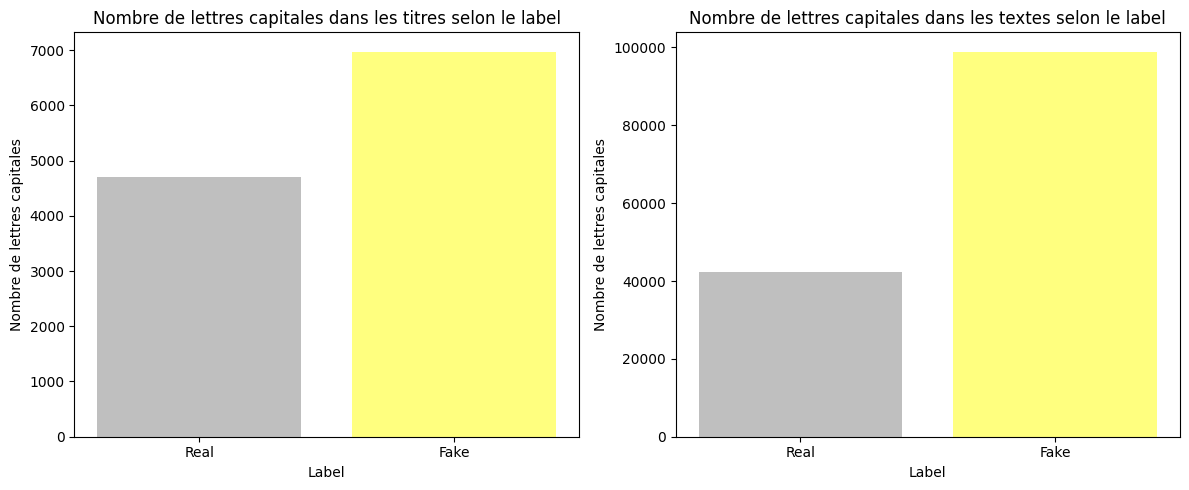

In [32]:
# lettres capitales

# sommes des lettres capitales selon le label pour les titres et les textes
caps_real_title_sum = df[df['type'] == 'real']['caps_title'].sum()
caps_fake_title_sum = df[df['type'] == 'fake']['caps_title'].sum()

caps_real_text_sum = df[df['type'] == 'real']['caps_text'].sum()
caps_fake_text_sum = df[df['type'] == 'fake']['caps_text'].sum()

# étiquettes
types = ['Real', 'Fake']

# valeurs pour les titres et les textes
caps_title_sum = [caps_real_title_sum, caps_fake_title_sum]
caps_text_sum = [caps_real_text_sum, caps_fake_text_sum]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# titres
axs[0].bar(types, caps_title_sum, color=['grey', 'yellow'], alpha=0.5)
axs[0].set_xlabel('Label')
axs[0].set_ylabel('Nombre de lettres capitales')
axs[0].set_title('Nombre de lettres capitales dans les titres selon le label')

# textes
axs[1].bar(types, caps_text_sum, color=['grey', 'yellow'], alpha=0.5)
axs[1].set_xlabel('Label')
axs[1].set_ylabel('Nombre de lettres capitales')
axs[1].set_title('Nombre de lettres capitales dans les textes selon le label')

plt.tight_layout()
plt.show()

Nous voyons que le corpus Fake présente davantage de lettres capitales que le corpus Real, que ce soit au niveau des titres et des textes. Cela pourrait se traduire par une volonté de la part des auteurs des fake news, d'attirer l'attention implicitement chez le lecteur (Yang et al., 2023). Cela pourrait également refléter un manque de standardisation dans les fake news (pas de calibrage lié à des recommandations éditoriales). Cette observation valide notre insight précédent.

Occupons-nous à présent des ponctuations exclamatives (points d'exclamation).

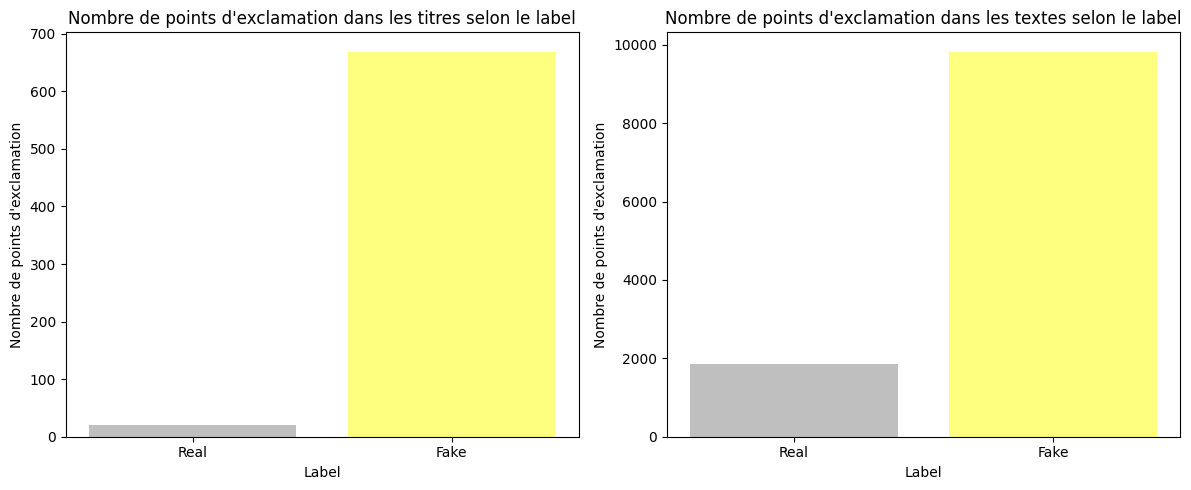

In [33]:
# points d'exclamation

# sommes des lettres capitales selon le label pour les titres et les textes
excl_real_title_sum = df[df['type'] == 'real']['excl_title'].sum()
excl_fake_title_sum = df[df['type'] == 'fake']['excl_title'].sum()

excl_real_text_sum = df[df['type'] == 'real']['excl_text'].sum()
excl_fake_text_sum = df[df['type'] == 'fake']['excl_text'].sum()

# étiquettes
types = ['Real', 'Fake']

# valeurs pour les titres et les textes
excl_title_sum = [excl_real_title_sum, excl_fake_title_sum]
excl_text_sum = [excl_real_text_sum, excl_fake_text_sum]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# titres
axs[0].bar(types, excl_title_sum, color=['grey', 'yellow'], alpha=0.5)
axs[0].set_xlabel('Label')
axs[0].set_ylabel('Nombre de points d\'exclamation')
axs[0].set_title('Nombre de points d\'exclamation dans les titres selon le label')

# textes
axs[1].bar(types, excl_text_sum, color=['grey', 'yellow'], alpha=0.5)
axs[1].set_xlabel('Label')
axs[1].set_ylabel('Nombre de points d\'exclamation')
axs[1].set_title('Nombre de points d\'exclamation dans les textes selon le label')

plt.tight_layout()
plt.show()

A l'instar des lettres capitales, on note une différence significative entre le nombre de points d'exclamation dans les Fake comparativement aux Real. Cela va dans le sens de l'observation précédente, soulignant le caractère emphatique des articles Fake, ajoutant un objectif rhétorique destiné à accentuer l'effet du fond de l'écriture. Voyons maintenant si la ponctuation exclamative, qui véhicule une forme de sentiment non verbal, s'accompagne d'une tendance équivalente au niveau de l'expression des sentiments. Ces informations se trouvent dans les colonnes dédiées du dataset.

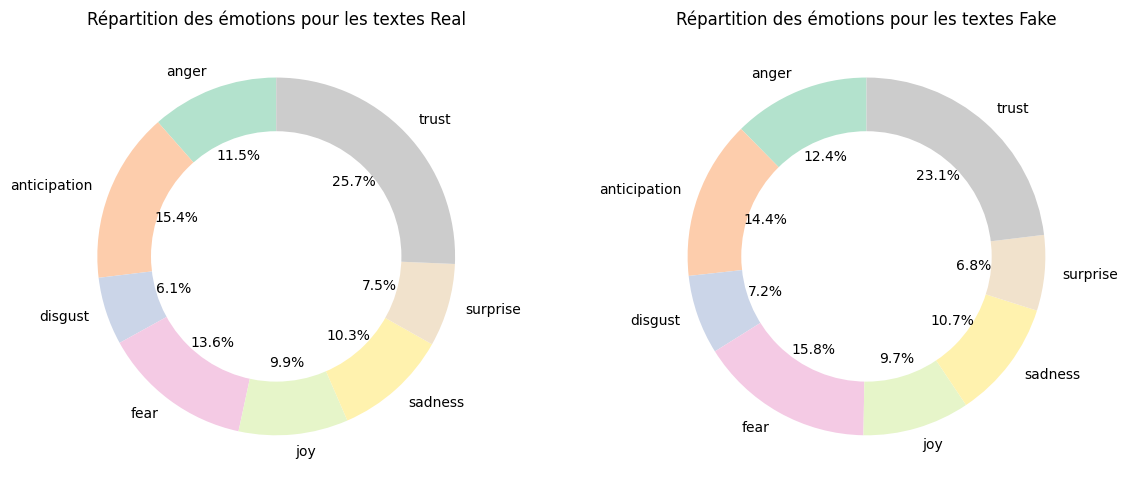

In [34]:
# émotions - panel

# sélection des colonnes correspondant aux émotions
emotion_cols = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

# sommes des valeurs de chaque émotion pour chaque label
emotions_real_sum = df[df['type'] == 'real'][emotion_cols].sum()
emotions_fake_sum = df[df['type'] == 'fake'][emotion_cols].sum()

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# graphique pour Real
axs[0].pie(emotions_real_sum, labels=emotions_real_sum.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel2.colors)
centre_cercle_real = plt.Circle((0,0),0.70,fc='white')
axs[0].add_artist(centre_cercle_real)
axs[0].set_title('Répartition des émotions pour les textes Real')

# graphique pour Fake
axs[1].pie(emotions_fake_sum, labels=emotions_fake_sum.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel2.colors)
centre_cercle_fake = plt.Circle((0,0),0.70,fc='white')
axs[1].add_artist(centre_cercle_fake)
axs[1].set_title('Répartition des émotions pour les textes Fake')

plt.tight_layout()
plt.show()

Sur ces graphiques, nous n'observons pas véritablement de différence majeure dans la répartition des sentiments selon le label. Il nous est possible de vérifier sur d'autres colonnes binaires, la répartition des sentiments agrégés en positifs et négatifs.

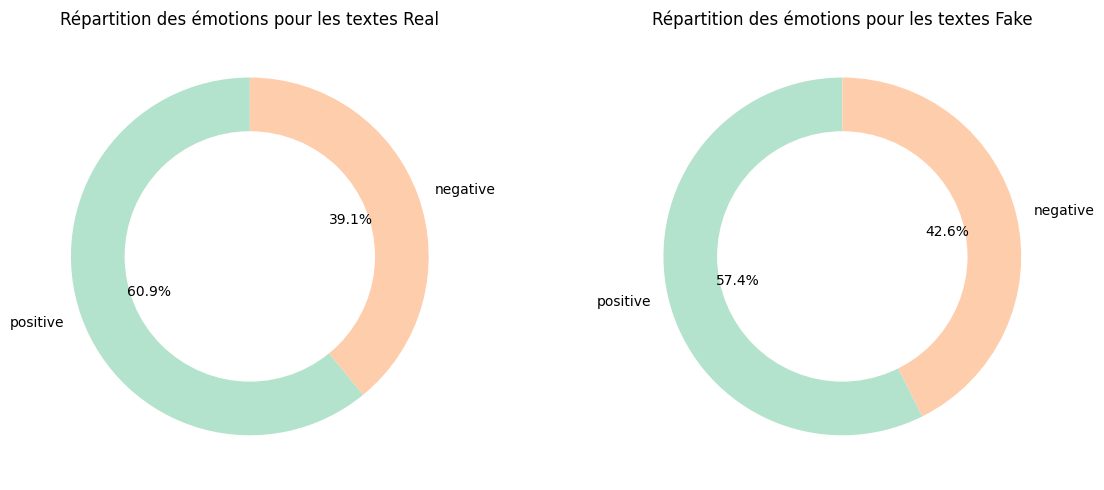

In [35]:
# émotions - positif versus négatif

# sélection des colonnes correspondant aux émotions
emotion_cols = ['positive', 'negative']

# sommes des valeurs de chaque émotion pour chaque label
emotions_real_sum = df[df['type'] == 'real'][emotion_cols].sum()
emotions_fake_sum = df[df['type'] == 'fake'][emotion_cols].sum()

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# graphique pour Real
axs[0].pie(emotions_real_sum, labels=emotions_real_sum.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel2.colors)
centre_cercle_real = plt.Circle((0,0),0.70,fc='white')
axs[0].add_artist(centre_cercle_real)
axs[0].set_title('Répartition des émotions pour les textes Real')

# graphique pour Fake
axs[1].pie(emotions_fake_sum, labels=emotions_fake_sum.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel2.colors)
centre_cercle_fake = plt.Circle((0,0),0.70,fc='white')
axs[1].add_artist(centre_cercle_fake)
axs[1].set_title('Répartition des émotions pour les textes Fake')

plt.tight_layout()
plt.show()

Ici, même si la différence n'est pas flagrante, il existe tout de même plus de termes négatifs parmi les corpus Fake que parmi les Real, et inversement pour les termes positifs, reflétant une tendance identique à celle que nous avons mentionnée précédemment.

Cette partie EDA nous a montré de manière intéressante que les articles Real et Fake ont des structures syntaxiques et linguistiques différentes, les premiers étant rédigés en conformité avec les standards éditoriaux, tandis que les seconds, plus libres, utilisent des formes rhétoriques ayant pour but d'accentuer l'usage des sentiments, surtout négatifs. Même si ces éléments seront par la suite nettoyés lors du pré-traitement linguistique, les modèles se basant, nous le verrons, sur d'autres caractéristiques, ils nous renseignent sur la manière dont, inconsciemment, ces textes orientent le point de vue du lecteur.

Nous allons à présenter effectuer une partie de traitement linguistique, ayant pour but de préparer les textes pour être pris en charge par les modèles. Si l'esprit humain se base sur les éléments que nous avons développés dans la partie EDA, et est donc potentiellement sensible aux biais implicites, la machine, elle, comprend des chiffres, et pour cela nous avons à lui fournir des textes propres et configurés selon certains standards, inhérents au NLP : suppression de la ponctuation, des mots de liaison, des lettres capitales, et réduction des mots à leur forme racine, etc. Ce sont ces données pré-traitées qui alimenteront tous les modèles. Cependant, selon le type de modèle, ML ou DL, la technique d'extraction des caractéristiques sera différente. Pour les modèles de ML, les caractéristiques auront besoin d'être extraites par un vectorizer (ici TF-IDF), alors que les réseaux de neurones définiront leurs propres features à partir d'une couche d'embedding (apprentissage par le réseau d'une représentation vectorielle dense des mots dans un espace de dimension inférieure).  

# Prétraitement linguistique des données

In [ ]:
# téléchargement des ressources nécessaires
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Engasser
[nltk_data]     Ophélie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Engasser
[nltk_data]     Ophélie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Engasser
[nltk_data]     Ophélie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Nous allons procéder aux traitements linguistiques suivants :
- Tokenisation : division du texte en 'tokens' (ici des mots)
- Normalisation : mise en minuscules
- Suppression de la ponctuation
- Suppression des mots vides ou de liaison (stopwords) et des mots inférieurs à 2 caractères
- Stemming : réduction des mots à leur radical (stème), à l'aide de l'algorithme de Snowball
- Ajout d'un filtre pour supprimer les abréviations communes, les initiales suivies d'un point et les chiffres

Remarque à propos de l'utilisation du stemming versus de la lemmatization : les deux méthodes permettent d'atteindre le même objectif, à savoir la réduction de la taille du vocabulaire pour éviter la sparsité de la matrice d'encodage. Dans ce sens, une utilisation combinée serait redondante. Après quelques essais sur des textes courts et au vu des résultats, il nous a semblé que le stemming à lui seul suffit, étant également plus simple que la lemmatization, sans que cette dernière n'offre beaucoup plus d'avantages compensant la complexité.

In [70]:
common_abbreviations = ["mr", "mrs", "ms", "dr", "etc"]

def preprocess_text(text):

    # tokenisation avec RegexpTokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)

    # normalisation
    tokens = [token.lower() for token in tokens]

    # suppression de la ponctuation
    tokens = [token for token in tokens if token not in string.punctuation]

    # suppression des stopwords
    stop_words = stopwords.words('english')
    tokens = [token for token in tokens if token not in stop_words]

    # suppression des mots inférieurs à deux caractères
    tokens = [w.strip() for w in tokens if w not in stop_words and len(w) > 1]

    # suppression des chiffres
    tokens = [word for word in tokens if not word.isdigit()]

    # stemming
    stemmer = SnowballStemmer('english')
    tokens = [stemmer.stem(token) for token in tokens]

    # ajout d'un filtre pour supprimer les abréviations communes
    tokens = [token for token in tokens if token.lower() not in common_abbreviations]

    # ajout d'un filtre pour supprimer les initiales suivies d'un point
    tokens = [re.sub(r'\b[A-Za-z]\.', '', token) for token in tokens]

    # concaténation
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

In [60]:
df['title'][0]

'At Donald Trumps Properties, a Showcase for a Brand and a President-Elect'

In [73]:
preprocess_text(df['title'][0])

'donald trump properti showcas brand presid elect'

In [74]:
# application de la fonction de prétraitement à la colonne 'title'
df['preprocessed_title'] = df['title'].apply(preprocess_text)
df['preprocessed_title']

0         donald trump properti showcas brand presid elect
1        trump foundat tell new york stop solicit state...
2        donald trump prepar white hous move tower may ...
3                lure chines investor trump name littl els
4         melania barron trump wont immedi move white hous
                               ...                        
19418    alabama lawmak sex coupl dont deserv financi b...
19419          gop senat david perdu joke pray obama death
19420       state depart say find email clinton specialist
19421    ethiopia obama seek progress peac secur east a...
19422                  jeb bush sudden attack trump matter
Name: preprocessed_title, Length: 19423, dtype: object

In [69]:
df['preprocessed_title'][3]

'lure chines investor trump name littl els'

In [75]:
# application de la fonction de prétraitement à la colonne 'text'
df['preprocessed_text'] = df['text'].apply(preprocess_text)
df['preprocessed_text']

0        stood line trump tower sometim half hour hand ...
1        donald trump foundat inform attorney general e...
2        presid elect donald trump white hous outsid po...
3        invest pitch new texa hotel tri lure well heel...
4        presid elect donald trump wife melania year ol...
                               ...                        
19418    conserv oppos marriag equal cite bibl natur po...
19419    freshman senat georgia quot scriptur right win...
19420    state depart told republican nation committe c...
19421    addi ababa ethiopia presid obama conven meet l...
19422    jeb bush sudden attack trump matter jeb bush p...
Name: preprocessed_text, Length: 19423, dtype: object

In [79]:
df['preprocessed_text'][2]

'presid elect donald trump white hous outsid populist promis drain swamp washington prepar assum presid open question remain capit repeat spurn much will becom part trump homebodi often flew sever hour late night campaign could wake bed trump tower talk advis mani night week spend white hous told would like use spend time new york futur first ladi melania trump expect move washington coupl year old son barron midway school year new york unclear move would happen question reflect trump advis describ presid elect come grip fact life chang radic say trump shock elect might spend week washington much like member congress return trump tower golf cours bedminst mar lago estat palm beach weekend hang familiar presid elect famili unusu earli question whether michell obama would leav chicago move white hous earli disrupt daughter school year whole famili move day inaugur trump advis hold possibl presid elect may spend time white hous grow less overwhelm comfort job still trump spent last three 

In [77]:
df.shape

(19423, 53)

In [80]:
# téléchargement du dataset prétraité
df.to_csv('data_preprocessed.csv', index=True)

In [2]:
path_pc = 'C:/Users/Engasser Ophélie/Desktop/ProjetIA/data_preprocessed.csv'
df = pd.read_csv(path_pc)

In [3]:
df = df.iloc[:, 2:]
df

author  comments    country  \
0                    JEREMY W. PETERS       0.0         US   
1                          STEVE EDER       0.0         US   
2       MAGGIE HABERMAN ASHLEY PARKER       0.0         US   
3      NELSON D. SCHWARTZ SUI-LEE WEE       0.0         US   
4                     MAGGIE HABERMAN       0.0         US   
...                               ...       ...        ...   
19418                        noauthor       NaN  nocountry   
19419                        noauthor       NaN  nocountry   
19420                        noauthor       NaN  nocountry   
19421                        noauthor       NaN  nocountry   
19422                        noauthor       NaN  nocountry   

                   crawled  domain_rank language  likes  \
0      2017-03-14 08:25:04            0  english    0.0   
1      2017-03-14 08:25:36            0  english    0.0   
2      2017-03-14 08:25:36            0  english    0.0   
3      2017-03-14 08:25:36            0  english    0.0   
4      2017-03-14 08:25:37            0  english    0.0   
...                    ...          ...      ...    ...   
19418                  NaN            0  english    NaN   
19419                  NaN            0  english    NaN   
19420                  NaN            0  english    NaN   
19421                  NaN            0  english    NaN   
19422                  NaN            0  english    NaN   

                                            main_img_url  ord_in_thread  \
0      https://static01.nyt.com/images/2016/11/23/us/...            0.0   
1      https://static01.nyt.com/images/2016/10/18/us/...            0.0   
2      https://static01.nyt.com/images/2016/11/12/us/...            0.0   
3      https://static01.nyt.com/images/2016/10/21/bus...            0.0   
4      https://static01.nyt.com/images/2016/11/21/us/...            0.0   
...                                                  ...            ...   
19418  https://t4.rbxcdn.com/c5695e5f087535e2066dc473...            NaN   
19419  https://t4.rbxcdn.com/c5695e5f087535e2066dc473...            NaN   
19420  https://t4.rbxcdn.com/c5695e5f087535e2066dc473...            NaN   
19421  https://t4.rbxcdn.com/c5695e5f087535e2066dc473...            NaN   
19422  https://t4.rbxcdn.com/c5695e5f087535e2066dc473...            NaN   

       participants_count  ... sadness  surprise  trust negative  positive  \
0                     0.0  ...       5        14     30       14        52   
1                     0.0  ...       4         5      9        8        15   
2                     0.0  ...       8         6     26       15        34   
3                     0.0  ...      10         6     32       24        43   
4                     0.0  ...       2         4     14        4        25   
...                   ...  ...     ...       ...    ...      ...       ...   
19418                 NaN  ...       2         0     14        8        13   
19419                 NaN  ...       7         5     13       14        21   
19420                 NaN  ...       4         4     23        9        21   
19421                 NaN  ...       9         9     42       26        62   
19422                 NaN  ...       5        15     17       16        25   

      first_all second_all third_all  \
0           409        150        45   
1           145         38        28   
2           440        168        68   
3           592        136        71   
4           223         82        28   
...         ...        ...       ...   
19418       128         27        26   
19419       135         46        19   
19420       284         67        22   
19421       531        116        61   
19422       301        116        29   

                                      preprocessed_title  \
0       donald trump properti showcas brand presid elect   
1      trump foundat tell new york stop solicit state...   
2      donald trump prepar white hous move tower may ...   
3              lur

In [4]:
df = df.dropna(subset=['preprocessed_text'])

In [5]:
df.shape

(19348, 52)

# Préparation des données

In [7]:
# création de la matrice X (ce n'est pas vraiment une matrice car elle ne contient qu'une variable)
X = df['preprocessed_text']
X

0        stood line trump tower sometim half hour hand ...
1        donald trump foundat inform attorney general e...
2        presid elect donald trump white hous outsid po...
3        invest pitch new texa hotel tri lure well heel...
4        presid elect donald trump wife melania year ol...
                               ...                        
19418    conserv oppos marriag equal cite bibl natur po...
19419    freshman senat georgia quot scriptur right win...
19420    state depart told republican nation committe c...
19421    addi ababa ethiopia presid obama conven meet l...
19422    jeb bush sudden attack trump matter jeb bush p...
Name: preprocessed_text, Length: 19348, dtype: object

In [8]:
# création du vecteur y
y = df['type']
y

0        real
1        real
2        real
3        real
4        real
         ... 
19418    real
19419    real
19420    real
19421    real
19422    real
Name: type, Length: 19348, dtype: object

In [9]:
# encodage de y en label 0-1
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded

array([1, 1, 1, ..., 1, 1, 1])

In [10]:
# vérification de la correspondance des étiquettes
pd.DataFrame({'label_original': y, 'label_encodé': y_encoded}).head()

label_original  label_encodé
0           real             1
1           real             1
2           real             1
3           real             1
4           real             1

Nous voyons que les Real = 1 et par inférence les Fake = 0.

In [11]:
np.unique(y_encoded)

array([0, 1])

In [12]:
# décomposition en tuples
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=101)

In [13]:
# vérification
print(len(df), len(X_train), len(X_test), len(y_train), len(y_test))

19348 15478 3870 15478 3870


# Extraction des caractéristiques - Vectorisation des textes

## TF-IDF

A l'instar de Sharma & Garg (2023), Khan et al. (2019), Agarwal et al. (2019), ou encore Pal, Kumar et Pal (2019) qui ont démontré l'efficacité de cette technique, nous utiliserons le vectorizer TF-IDF pour réaliser l'extraction de caractéristiques. TF-IDF est une mesure statistique qui évalue l'importance d'un terme dans un document, par rapport à un corpus entier. Cette technique est intéressante car elle prend en compte non seulement la fréquence d'un mot, mais sa fréquence relative par rapport à son importance, ou sa rareté, dans le vocabulaire d'une langue donnée (par ex., le mot "donc" en français est très répandu, pourtant il ne va pas apporter beaucoup d'information sémantique dans une phrase, par contre si l'on rencontre souvent le mot "terroriste", cela peut apporter de l'information, car il s'agit d'un mot moins fréquent "relativement" à d'autres).

Mathématiquement, cet algorithme est calculé de la manière suivante: $$TF-IDF(i, j) = \frac{tf(i, j)}{k+tf(i, j)} \times log (\frac{N}{df(i)})$$
où $tf(i, j)$ représente le nombre d'occurrences du terme $i$ dans le document $j$ ; $k$ est un paramètre pour lisser la fréquence de terme, souvent défini à 1 ; $N$ est le nombre total de documents, et $df(i)$ est le nombre de documents contenant le terme $i$ (pour une explication mathématique, voir Sharma & Garg, 2023).

In [14]:
# instanciation d'un objet
tfidf_vectorizer = TfidfVectorizer()

# vectorisation du texte
X_train = tfidf_vectorizer.fit_transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

In [15]:
# affichage de la matrice TF-IDF
print("Matrice TF-IDF:\n", X_train.toarray())

Matrice TF-IDF:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [16]:
type(X_train)

scipy.sparse._csr.csr_matrix

In [17]:
print(X_train.min(), X_train.max())

0.0 1.0


In [18]:
X_train.shape

(15478, 80599)

L'interprétation de cette matrice se fait de la façon suivante :
- Une ligne représente un document (ici, un texte), et nous en avons 15478
- Une colonne représente un mot unique dans le corpus global, et il y a 80599 mots uniques en tout
- Les coefficient $a_{ij}$ représentent les poids de chaque terme dans le document (leur valeur est comprise dans l'intervalle $[0, 1]$). Cela signifie que si un mot apparaît dans un texte, il aura un poids TF-IDF non nul dans la matrice correspondante. Il aura une valeur de zéro sinon.

# Modèles de Machine Learning

Nous allons implémenter des modèles de ML, en nous focalisant sur les modèles les plus souvent recommandés dans la littérature pour ce type de tâche ainsi que ce type de cas d'usage (e.g. Nagashri & Sangeetha, 2021 ; Ahmed et al., 2021 ; Khan et al., 2019). Ainsi, nous testerons les modèles suivants, avec une optimisation par cross-validation et grid search pour l'ajustement des hyper-paramètres :
- Naive Bayes
- Random Forest
- SVM
- Logistic Regression
- Passive-aggressive
- AdaBoost / Gradient Boosting

Sharma & Garg (2023) expliquent que le Naive Bayes performe bien sur de grands ensembles de données. Cependant, ils ont démontré, en utilisant le dataset IFND pour une tâche de détection de fake news, que le Naive Bayes présentait la moins bonne précision (87.5%), comparativement au KNN, Decision Tree, Logistic Regression et Random Forest, ce dernier présentant la meilleure accuracy (94%). En revanche, Khan et al. (2019) ont montré, sur le même cas d'usage, que la meilleure performance provient d'un Naive Bayes, combiné à une extraction de caractéristiques TF-IDF bigramme, ce qui rejoint la remarque des auteurs précédents concernant le potentiel de ce modèle sur de grands datasets. Agarwal et al. (2019) quant à eux, découvrent pour les fake news, de bons résultats avec un SVM et une régression logistique, avec un avantage pour le SVM en terme d'accuracy. Ils nuancent cependant avec un manque de généralisation des modèles pour des textes s'écartant du domaine politique et économique. Choudhury & Acharjee (2023) découvrent également une supériorité pour le SVM parmi SVM, Naive Bayes, Régression Logistique et Random Forest. Enfin, Nagashri & Sangeetha (2021) mettent en avant le bien-fondé du modèle Passif-Agressif. Nous pouvons donc déduire de ces quelques exemples qu'il n'existe pas de consensus, y compris sur des datasets assez comparables, concernant les performances des modèles traditionnels de Machine Learning, hautement dépendants des données d'entraînement. Aussi, notre démarche sera de tester différents modèles et de les comparer dans un benchmark, à l'instar de ce qui est réalisé dans les études de la littérature.

Pour cette section, nous avons suivi le cours Udemy "Data science et machine learning masterclass python" de José Portilla, Rod & MonCoachData. Le choix des hyperparamètres sera réalisé en regard de la tâche, à partir de ces tutoriels, et de la documentation sklearn.

Méthodologiquement, l'approche par une cross-validation et une grid search pour chaque modèle répond à 2 objectifs : le premier est de gagner du temps sur le réglage des hyperparamètres, et le second est de développer une approche valide et non biaisée, en réservant un ensemble dit 'hold out' qui servira d'ensemble test final, contenant des données que le modèle aura réellement non vues au préalable.

## Naive Bayes model

Le modèle Naive Bayes est une méthode de classification probabiliste basée sur le théorème de Bayes
$$P(C_k|x_i) = \frac{P(x_i|C_k).P(C_k)}{P(x_i)}$$ 
qui estime la probabilité qu'un point de données appartienne à une classe particulière $C_k$, en utilisant les probabilités conditionnelles des caractéristiques $x_i$. A la base, le modèle postule "naïvement" que toutes les caractéristiques sont indépendantes les unes des autres. Par ex. dans un problème de classification de texte, le modèle suppose que la présence d'un mot particulier dans un document est indépendante de la présence d'autres mots. De cette façon, en connaissant les probabilités d'une caractéristique sachant une classe, la probabilité d'une classe (ici 0.5) et d'une caractéristique, on peut "remonter" vers la connaissance de la probabilité d'une classe, sachant une caractéristique.

Nous allons tester plusieurs valeurs de l'hyperparamètre alpha dans une GridSearchCV. Alpha est un paramètre de lissage, utilisé pour éviter les probabilités nulles, notamment pour les caractéristiques qui n'apparaissent pas dans toutes les classes. Cela ajoute des observations fictives de chaque caractéristique dans chaque classe. Un alpha égal à zéro signifie aucun lissage, avec un risque de surajustement, alors qu'un alpha trop fort lisse excessivement.

In [40]:
# instanciation d'un objet de la classe
nb = MultinomialNB()

In [41]:
# définition d'une plage d'hyperparamètres (ici alpha)
param_grid = {'alpha':[0.01, 0.1, 1.0, 10.0]}

In [42]:
# implémentation de la grid
grid_nb = GridSearchCV(nb, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

In [43]:
# entraînement
grid_nb.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0]}, scoring='accuracy',
             verbose=2)

In [44]:
# visualisation des performances d'entraînement
print("Meilleurs hyperparamètres trouvés:")
print(grid_nb.best_params_)
print("Score de validation croisée associé:")
print(grid_nb.best_score_)

Meilleurs hyperparamètres trouvés:
{'alpha': 0.01}
Score de validation croisée associé:
0.8998577350314964


In [115]:
# visualisation des résultats de la grid
pd.DataFrame(grid_nb.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.193509      0.012683         0.023285        0.008611        0.01   
1       0.192696      0.005044         0.027660        0.006587         0.1   
2       0.198771      0.008926         0.021745        0.005584         1.0   
3       0.143732      0.030169         0.016447        0.005774        10.0   

            params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.01}           0.902778           0.895349           0.903424   
1   {'alpha': 0.1}           0.901163           0.888243           0.898579   
2   {'alpha': 1.0}           0.878553           0.872739           0.874677   
3  {'alpha': 10.0}           0.850452           0.839470           0.845284   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.895638           0.902100         0.899858        0.003589   
1           0.891761           0.892730         0.894495        0.004708   
2           0.874313           0.872698         0.874596        0.002135   
3           0.843296           0.838449         0.843390        0.004319   

   rank_test_score  
0                1  
1                2  
2                3  
3                4

In [45]:
# sélection du meilleur estimateur
best_nb = grid_nb.best_estimator_

In [46]:
# prédictions
pred = best_nb.predict(X_test)

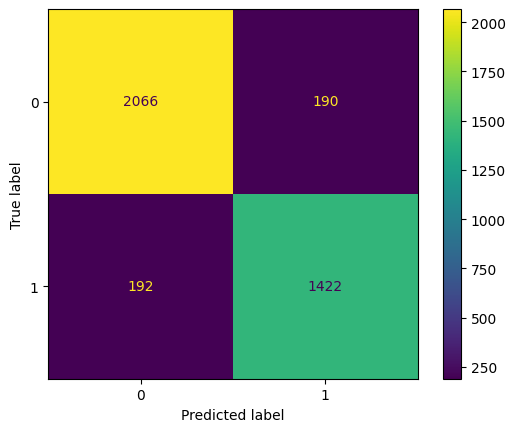

In [47]:
# matrice de confusion
ConfusionMatrixDisplay.from_estimator(grid_nb, X_test, y_test);

In [48]:
print(classification_report(y_test, pred, digits=5))

              precision    recall  f1-score   support

           0    0.91497   0.91578   0.91537      2256
           1    0.88213   0.88104   0.88159      1614

    accuracy                        0.90129      3870
   macro avg    0.89855   0.89841   0.89848      3870
weighted avg    0.90128   0.90129   0.90128      3870



Le score sur l'ensemble test est identique à celui obtenu lors de la CV, ceci indique qu'il n'y a pas d'overfitting.

## Random Forest

L'utilisation de ce modèle répond à l'amélioration des performances et à la levée des limitations liées aux arbres de décisions classiques. Le modèle random forest est un apprenant dit d'ensemble (constitué de plusieurs arbres de décisions) qui créé des sous-ensembles de features sélectionnées aléatoirement pour chaque division potentielle. Toute feature utile finira donc par être sélectionnée. Finalement, la prédiction retenue sera celle de la majorité des arbres (prédiction agrégée par un système de vote), ou alors une probabilité de classe sortante.

La majorité des hyperparamètres sont communs avec ceux des arbres de décisions. Pour les hyperparamètres spécifiques au random forest, nous choisissons, grâce à la grid search, de faire varier:
- Le nombre d'estimateurs (n_estimators) : combien d'arbres ? De manière très intéressante, l'étude princeps de Breiman (2001) nous montre que naturellement les possibilités d'apprendre augmentent avec le nombre d'estimateurs, mais qu'en plus, il n'existe pas de risque d'overfitting car à mesure que le nombre d'arbres augmente, ceux-ci finissent par utiliser les mêmes features et à se corréler. Il n'y a donc pas d'augmentation de la complexité, mais plutôt une duplication des prédictions. La littérature présente empiriquement une valeur raisonnable par défaut aux environs de 100 pour cet hyperparamètre.
- Le nombre de features (max_features) : combien de features dans chaque sous-ensemble aléatoire ? A nouveau, la publication d'origine (Breiman, 2001) suggère de fixer le nombre de features aléatoires à $log_2 (N+1)$ dans le sous-ensemble. D'autres constats empiriques proposent $\sqrt{N}$, d'autres encore $\frac{N}{3}$ (pour la régression).
- Echantillons Bootstrap (bootstrap) : échantillonnage aléatoire avec remplacement, fixé à True par défaut. Il s'agit d'entraîner chaque estimateur sur un sous-ensemble de lignes et de features, limitant ainsi la corrélation des arbres entre eux, et favorisant la généralisation à de nouvelles données inédites.

Remarque sur l'hyperparamètre spécifique Erreur OOB (oob_score) : découlant du paramètre précédent, si l'ensemble ne voit pas un certain nombre de données, il sera alors possible de s'en servir pour calculer une métrique d'erreur additionnelle et facultative (réglée à False par défaut). Toutefois, du fait que ce paramètre n'affecte aucunement l'entrainement ni les arbres, nous ne le ferons pas intervenir dans notre grid.

Pour les hyperparamètres communs avec Decision Tree, nous ferons varier la qualité de la division des noeuds (criterion) : nous testerons ainsi :
- L'indice (impureté) de Gini, soit la probabilité qu'un élément choisi au hasard soit mal classé.
- L'entropie, soit la mesure de l'incertitude et du désordre.
- La log loss, généralement utilisée dans des tâches de classification (notons que son utilisation comme critère de division pour un arbre de décision est peu fréquente dans la littérature).

Nous ne ferons pas varier max_depth et max_leaf_nodes, paramètres qui permettent de minimiser la complexité de l'ajustement du modèle, considérant que dans notre cas, nous laisserons le modèle "libre" d'explorer toute la variance possible dans les données pour maximiser les performances.

In [64]:
rf = RandomForestClassifier()

In [65]:
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              #'max_depth': [5, 10],
              #'max_leaf_nodes': [5, 10],
              'n_estimators': [64, 100, 128],
              'max_features': ['sqrt', 'log2'],
              'bootstrap': [True, False]}

In [66]:
grid_rf = GridSearchCV(rf, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

In [67]:
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [64, 100, 128]},
             scoring='accuracy', verbose=2)

In [68]:
print("Meilleurs hyperparamètres trouvés:")
print(grid_rf.best_params_)
print("Score de validation croisée associé:")
print(grid_rf.best_score_)

Meilleurs hyperparamètres trouvés:
{'bootstrap': False, 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 128}
Score de validation croisée associé:
0.8992108426945185


In [69]:
best_rfc = grid_rf.best_estimator_
pred = best_rfc.predict(X_test)

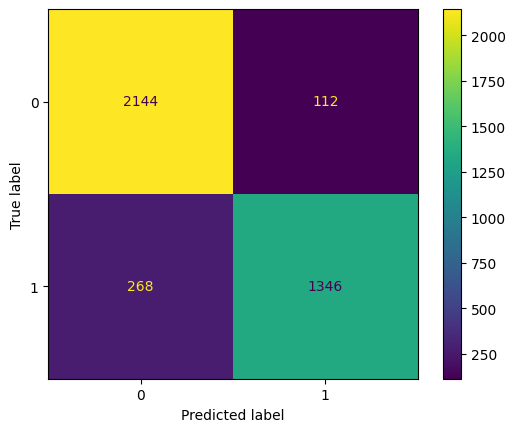

In [70]:
ConfusionMatrixDisplay.from_estimator(grid_rf, X_test, y_test);

In [71]:
print(classification_report(y_test, pred, digits=5))

              precision    recall  f1-score   support

           0    0.88889   0.95035   0.91859      2256
           1    0.92318   0.83395   0.87630      1614

    accuracy                        0.90181      3870
   macro avg    0.90604   0.89215   0.89745      3870
weighted avg    0.90319   0.90181   0.90096      3870



## SVM

Mathématiquement, ce modèle se base sur la création d'hyperplans (sous-espaces de dimension $N-1$) pour séparer des classes, l'enjeu étant de trouver le placement adéquat de ce séparateur pour minimiser l'erreur de prédiction, sachant que ce séparateur doit à la fois admettre des marges qui maximisent la distance entre les classes, mais aussi des marges qui ont suffisamment de souplesse (et donc introduisent un terme d'erreur $\epsilon$) pour offrir un bon compromis biais-variance dans le modèle. Plus formellement, on peut écrire la formule décrivant les classificateurs à vecteurs de support comme suit: $$y_i(\beta_0 + \beta_1 X_{i1} + \beta_2 X_{i2} + ... + \beta_p X_{ip}) \ge M(1-\epsilon_i)$$ où il s'agit de choisir les meilleurs coefficients $\beta$ pour maximiser la marge $M$, tout en jouant avec $\epsilon$. La publication princeps (Cortes & Vapnik, 1995) introduit le concept de "kernel trick", utilisant le produit scalaire (mesure de la similarité entre l'espace de features d'origine et l'espace de features élargi) pour réduire le coût en calcul lié à des noyaux non linéaires qui engendreraient beaucoup de complexité dans le modèle.

Pour ce modèle complexe, comportant plusieurs hyperparamètres qui ne sont pas faciles à régler intuitivement, la grid search est particulièrement indiquée. Ainsi, nous ferons varier:
- Le paramètre de régulation (C) : dans le modèle, plus C est grand, plus nous acceptons d'erreurs de classification ; dans sklearn, pour rester dans la cohérence par rapport aux autres modèles, C a été prévu pour être inversement proportionnel à la tolérance en erreur (donc plus C est petit, plus on acceptera de points à l'intérieur des marges).
- Le noyau (kernel) : le type de noyau qui projette les données dans une dimension supérieure (linéaire, ou non linéaire - e.g. à fonction de base radiale rbf). Sklearn fixe un noyau rbf par défaut, car c'est celui qui performe le mieux.
- La flexibilité dans la frontière de décision (gamma) : une valeur faible admettra une frontière plus lisse (et donc un risque d'underfitting), alors qu'une valeur élevée admettra une frontière plus complexe (avec un risque d'overfitting). Nous testerons les gamma 'scale' (par défaut, qui utilise $\frac{1}{nfeatures \times X.var()}$ comme valeur) et 'auto' (qui utilise $\frac{1}{nfeatures}$)

In [19]:
svm = SVC()

param_grid = {'C':[0.01, 0.1, 1],
              'kernel':['linear', 'rbf', 'sigmoid'],
              'gamma': ['scale', 'auto']
              }
grid_svm = GridSearchCV(svm, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

In [20]:
grid_svm.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=2)

In [21]:
print("Meilleurs hyperparamètres trouvés:")
print(grid_svm.best_params_)
print("Score de validation croisée associé:")
print(grid_svm.best_score_)

Meilleurs hyperparamètres trouvés:
{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Score de validation croisée associé:
0.9364904843604546


In [22]:
best_svm = grid_svm.best_estimator_
pred = best_svm.predict(X_test)

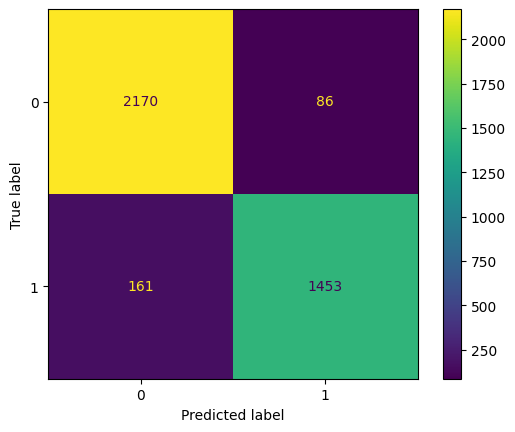

In [23]:
ConfusionMatrixDisplay.from_estimator(grid_svm, X_test, y_test);

In [24]:
print(classification_report(y_test, pred, digits=5))

              precision    recall  f1-score   support

           0    0.93093   0.96188   0.94615      2256
           1    0.94412   0.90025   0.92166      1614

    accuracy                        0.93618      3870
   macro avg    0.93753   0.93106   0.93391      3870
weighted avg    0.93643   0.93618   0.93594      3870



## Régression logistique

La régression logistique est un modèle largement utilisé pour la classification, en prédisant la probabilité qu'une observation appartienne à une certaine classe. Elle fonctionne par la transformation d'un modèle de régression linéaire $$\hat{Y} = \sum_{i=0}^n \beta_i x_i$$ en un modèle de classification, grâce à la fonction logistique (ou sigmoïde) $$\sigma(x) = \frac{1}{1+e^{-x}}$$ et ceci afin de transformer toute entrée en une valeur comprise entre 0 et 1, qui pourra ainsi être traitée comme une probabilité. Pour quantifier l'erreur, ce modèle fonctionne avec le maximum de vraisemblance, ou la plausibilité du modèle vis-à-vis de vraies données. Il s'agira donc de trouver les valeurs des $\beta$ qui maximisent la probabilité d'obtenir les données réellement observées. Cela revient à minimiser le négatif du log de la fonction de vraisemblance (log loss).

Pour l'optimisation, nous ferons varier dans une grid search:
- La pénalité de régularisation (penalty) : nous testerons la régularisation L1 (Lasso) et L2 (Ridge).
- La valeur C de la régularisation : il est recommandé d'utiliser des valeurs C espacées logarithmiquement. Ses valeurs sont, comme pour le SVM, inversement proportionnelles à la tolérance à l'erreur.
- Le solveur (solver) pour spécifier l'algorithme à utiliser pour résoudre le problème d'optimisation lors de l'estimation des coefficients : par défaut 'lbfgs', 'sag' et 'saga' recommandés pour des grands ensembles de données.
- Le nombre maximal d'itérations autorisées lors de l'optimisation des coefficients (max_iter) : nous fixerons une valeur de 500 dès l'instanciation du classifier.

In [32]:
lr = LogisticRegression(max_iter=500)

In [33]:
param_grid = {'penalty': ['l1', 'l2'],
              'C': np.logspace(0, 4, 10),
              'solver':['lbfgs', 'sag', 'saga']}
grid_lr = GridSearchCV(lr, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

In [34]:
grid_lr.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=500), n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'sag', 'saga']},
             scoring='accuracy', verbose=2)

In [35]:
print("Meilleurs hyperparamètres trouvés:")
print(grid_lr.best_params_)
print("Score de validation croisée associé:")
print(grid_lr.best_score_)

Meilleurs hyperparamètres trouvés:
{'C': 59.94842503189409, 'penalty': 'l2', 'solver': 'sag'}
Score de validation croisée associé:
0.9364904426160392


In [36]:
best_lr = grid_lr.best_estimator_
pred = best_lr.predict(X_test)

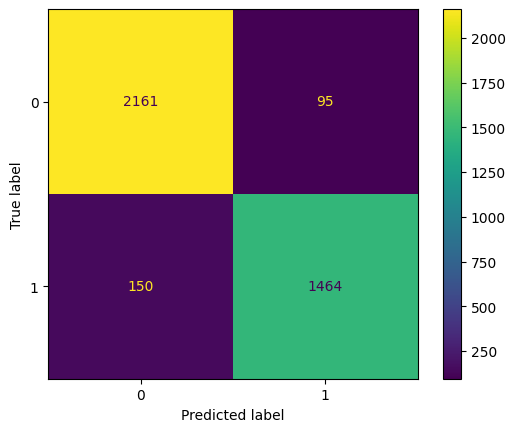

In [37]:
ConfusionMatrixDisplay.from_estimator(grid_lr, X_test, y_test);

In [38]:
print(classification_report(y_test, pred, digits=5))

              precision    recall  f1-score   support

           0    0.93509   0.95789   0.94635      2256
           1    0.93906   0.90706   0.92279      1614

    accuracy                        0.93669      3870
   macro avg    0.93708   0.93248   0.93457      3870
weighted avg    0.93675   0.93669   0.93653      3870



## Passif-agressif

Ce modèle est principalement utilisé pour des tâches de classification binaire. Son nom provient de son comportement lors de la mise à jour des paramètres du modèle. En effet, il s'adapte de manière "passive" lorsque les prédictions du modèle sont correctes, mais devient "agressif" en cas d'erreur de classification, en effectuant alors des mises à jour de ses paramètres, afin de minimiser l'erreur. Cette mise à jour se réalise de manière incrémentale en utilisant une projection, et s'effectue comme suit : $$w = w + \eta yx$$ où $\eta$ est le taux d'apprentissage, et $y$ le label. Cet algorithme est particulièrement intéressant pour des données traitées en temps réel et de manière continue, cas d'usage où le modèle doit s'adapter en permanence à l'arrivée de nouvelles entrées.

Les hyperparamètres que nous retiendrons et ferons varier sont :
- Le paramètre de régularisation C : il sera testé à différentes échelles.
- La fonction de coût (loss) : 'hinge' pour le PA-I dans la publication de référence, et 'squared_hinge' pour le PA-II.
- Le maximum d'itérations : nous ne spécifierons pas ce paramètre et ainsi laisserons la valeur par défaut, 1000.

In [25]:
pa = PassiveAggressiveClassifier()

In [26]:
param_grid = {'C': [0.01, 0.1, 1],
              'loss': ['hinge', 'squared_hinge']}
grid_pa = GridSearchCV(pa, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

In [27]:
grid_pa.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=PassiveAggressiveClassifier(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1],
                         'loss': ['hinge', 'squared_hinge']},
             scoring='accuracy', verbose=2)

In [28]:
print("Meilleurs hyperparamètres trouvés:")
print(grid_pa.best_params_)
print("Score de validation croisée associé:")
print(grid_pa.best_score_)

Meilleurs hyperparamètres trouvés:
{'C': 0.01, 'loss': 'hinge'}
Score de validation croisée associé:
0.9375889469136267


In [29]:
best_pa = grid_pa.best_estimator_
pred = best_pa.predict(X_test)

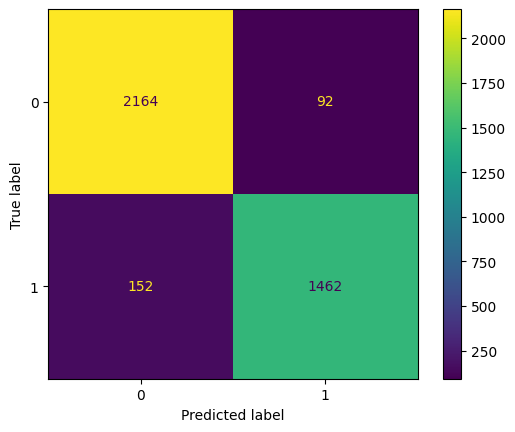

In [30]:
ConfusionMatrixDisplay.from_estimator(grid_pa, X_test, y_test);

In [31]:
print(classification_report(y_test, pred, digits=5))

              precision    recall  f1-score   support

           0    0.93437   0.95922   0.94663      2256
           1    0.94080   0.90582   0.92298      1614

    accuracy                        0.93695      3870
   macro avg    0.93758   0.93252   0.93481      3870
weighted avg    0.93705   0.93695   0.93677      3870



## Méthodes de Boosting

Les méthodes de Boosting ne sont pas des algorithmes de Machine Learning à proprement parler, mais sont plutôt des algorithmes d'ensemble ou méthodes de méta-apprentissage, qui fonctionnent selon un principe d'agrégation de résultats. Ils peuvent être utilisés avec toutes sortes de modèles, mais fonctionnent généralement bien avec les arbres de décision, dont ils parviennent à améliorer les performances (à ce titre on remarque que les paramètres définis par sklearn sont adaptés aux decision trees). C'est avec les arbres que nous allons les utiliser ici. Ils consistent en une agrégation de modèles dits "apprenants faibles" (un modèle trop simpliste pour performer seul - les petits arbres "souches" en sont une bonne illustration), dans un ensemble d' "apprenants forts". Pour cela, une combinaison d'estimateurs avec un certain coefficient appliqué, pourrait agir comme un estimateur d'ensemble efficace. En d'autres termes il s'agirait d'une sorte de concaténation de modèles auxquels on a appliqué un coefficient $\alpha$. Nous avons donc:
$$F_T(x)= \sum_{t=1}^T f_t(x)$$
avec l'ensemble d'apprenants faibles représenté par:
$$f_t(x)= \alpha_t h(x)$$
où $T$ représente le nombre total d'arbres, $t$ un arbre particulier, et $h$ une hypothèse de sortie.

De manière globale, comme pour tous les modèles, l'enjeu sera de minimiser les erreurs de prédiction. Dans ce type de méthode, cela sera réalisé en trouvant le meilleur nombre d'apprenants faibles, les apprenants les plus "doués", ainsi qu'un coefficient $\alpha$ optimal. Nous allons nous pencher sur les performances de deux estimateurs : AdaBoost et Gradient Boosting. Les principales différences entre les 2 méthodes sont :
- Un coefficient $\alpha$ qui diffère selon l'apprenant pour AdaBoost (plus il est élevé, plus l'apprenant a d'influence), mais qui est commun à tous pour Gradient Boosting.
- Une stratégie d'ajustement des poids différente : si AdaBoost se base sur les exemples mal classés dont il augmente les poids pour faciliter la décision de l'apprenant suivant, Gradient Boosting se base sur la fonction de perte.

### AdaBoost Classifier

Pour AdaBoost, nous ferons varier les hyperparamètres suivants (nous savons que par défaut c'est decision tree qui est utilisé comme estimateur):
- Le nombre d'estimateurs (n_estimators) : fixé à 50 par défaut, nous prendrons 50 et 100.
- Le taux d'apprentissage (learning_rate) : taux par défaut, 2x plus lent, et 2x plus rapide.
- La profondeur maximale des apprenants (max_depth) : par défaut 1 (une souche).

In [72]:
ab = AdaBoostClassifier()

In [73]:
param_grid = {'n_estimators': [50, 100],
              'learning_rate': [0.1, 0.05, 0.2]}
grid_ab = GridSearchCV(ab, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

In [74]:
grid_ab.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [75]:
print("Meilleurs hyperparamètres trouvés:")
print(grid_ab.best_params_)
print("Score de validation croisée associé:")
print(grid_ab.best_score_)

Meilleurs hyperparamètres trouvés:
{'learning_rate': 0.2, 'n_estimators': 100}
Score de validation croisée associé:
0.8782786481488438


In [76]:
best_ab = grid_ab.best_estimator_
pred = best_ab.predict(X_test)

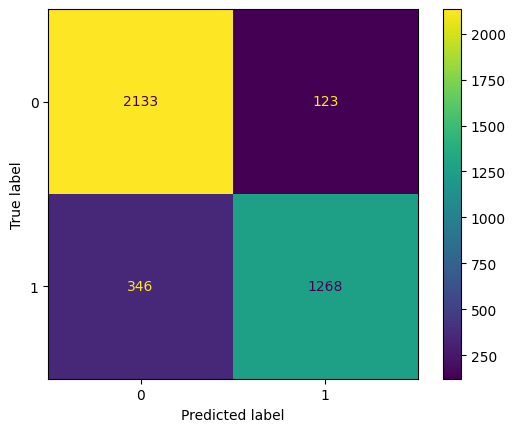

In [77]:
ConfusionMatrixDisplay.from_estimator(grid_ab, X_test, y_test);

In [78]:
print(classification_report(y_test, pred, digits=5))

              precision    recall  f1-score   support

           0    0.86043   0.94548   0.90095      2256
           1    0.91157   0.78563   0.84393      1614

    accuracy                        0.87881      3870
   macro avg    0.88600   0.86555   0.87244      3870
weighted avg    0.88176   0.87881   0.87717      3870



In [79]:
best_ab.feature_importances_.argmax()

61286

### Gradient boosting classifier

Nous ferons varier dans la grid search:
- Le nombre d'estimateurs (n_estimators).
- Le taux d'apprentissage (learning_rate) : taux par défaut, 2x plus lent, et 2x plus rapide.
- La profondeur maximale des apprenants (max_depth).

Notons que la grid search est ici particulièrement appropriée pour trouver un compromis entre le taux d'apprentissage et le nombre d'estimateurs : c'est crucial car plus le taux d'apprentissage est élevé, plus les arbres suivants auront un effet important, il suffira alors de quelques arbres. Mais s'il est trop élevé, on n'obtiendra pas les meilleures performances car on aura pas pris le temps d'apprendre. A contrario, si le taux est trop faible, les arbres suivants auront peu d'influence et il faudra créer plus d'arbres, ce qui augmentera d'autant le temps d'apprentissage.

In [19]:
gb = GradientBoostingClassifier()

In [20]:
param_grid = {'n_estimators': [50, 100],
              'learning_rate': [0.1, 0.05, 0.2],
              'max_depth': [3, 4, 5]}
grid_gb = GridSearchCV(gb, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

In [21]:
grid_gb.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [22]:
print("Meilleurs hyperparamètres trouvés:")
print(grid_gb.best_params_)
print("Score de validation croisée associé:")
print(grid_gb.best_score_)

Meilleurs hyperparamètres trouvés:
{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
Score de validation croisée associé:
0.9190458061472826


In [23]:
best_gb = grid_gb.best_estimator_
pred = best_gb.predict(X_test)

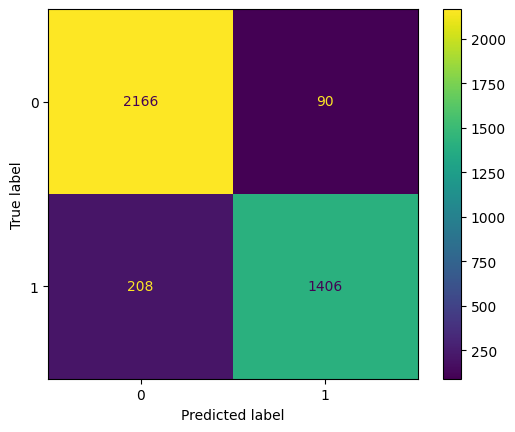

In [24]:
ConfusionMatrixDisplay.from_estimator(grid_gb, X_test, y_test);

In [34]:
print(classification_report(y_test, pred, digits=5))

              precision    recall  f1-score   support

           0    0.91238   0.96011   0.93564      2256
           1    0.93984   0.87113   0.90418      1614

    accuracy                        0.92300      3870
   macro avg    0.92611   0.91562   0.91991      3870
weighted avg    0.92383   0.92300   0.92252      3870



Intéressons-nous aux features principales ayant été discriminantes pour le Gradient Boosting, c'est-à-dire la hiérarchie des features ayant servi de décision pour chaque noeud, calculées en fonction de la diminution de l'impureté des noeuds que chaque feature apporte lors de la division des données.

In [26]:
feat_import = best_gb.feature_importances_

In [27]:
# sortir la liste des mots
words = tfidf_vectorizer.get_feature_names_out()

for i, word in enumerate(words):
    print(f"Mot {i}: {word}")

Mot 0: 0001pt
Mot 1: 000and
Mot 2: 000arent
Mot 3: 000billion
Mot 4: 000compar
Mot 5: 000email
Mot 6: 000employe
Mot 7: 000for
Mot 8: 000ft
Mot 9: 000in
Mot 10: 000job
Mot 11: 000judg
Mot 12: 000k
Mot 13: 000km
Mot 14: 000lb
Mot 15: 000mg
Mot 16: 000s
Mot 17: 000sponsorship
Mot 18: 000th
Mot 19: 000up
Mot 20: 000wasnt
Mot 21: 000which
Mot 22: 000x
Mot 23: 0023z
Mot 24: 0054z
Mot 25: 005s
Mot 26: 006s
Mot 27: 007s
Mot 28: 008s
Mot 29: 00am
Mot 30: 00archiv
Mot 31: 00g
Mot 32: 00o
Mot 33: 00p
Mot 34: 00pm
Mot 35: 00s
Mot 36: 0107i
Mot 37: 011s
Mot 38: 0135i
Mot 39: 013c2812c9
Mot 40: 016e5d9ff252f2444790d05269f4ed90
Mot 41: 01am
Mot 42: 01pm
Mot 43: 01s
Mot 44: 01welcom
Mot 45: 022vfnstnd
Mot 46: 02pm
Mot 47: 02welcom
Mot 48: 033s
Mot 49: 03am
Mot 50: 03eb
Mot 51: 03pm
Mot 52: 03r9a4eoni
Mot 53: 04pm
Mot 54: 050100pupush
Mot 55: 053s
Mot 56: 056g
Mot 57: 05917v1
Mot 58: 06pm
Mot 59: 06quito2150
Mot 60: 06quito2991
Mot 61: 07c
Mot 62: 07dryempjx
Mot 63: 07pm
Mot 64: 0802141a
Mot 65: 0896n

In [28]:
import_feats = pd.DataFrame(index=words, data=feat_import, columns=['Importance'])

In [29]:
# tri par importance
import_feats.sort_values("Importance", ascending=False)

Importance
said          0.257033
republican    0.076867
donald        0.064340
hillari       0.038898
us            0.031945
...                ...
fug           0.000000
fufor         0.000000
fufil         0.000000
fuest         0.000000
zz            0.000000

[80599 rows x 1 columns]

In [30]:
imp_feats = import_feats[import_feats['Importance'] > 0.00527]

In [31]:
imp_feats.sort_values('Importance')

Importance
debat         0.005855
obama         0.005879
administr     0.006741
sourc         0.006832
presidenti    0.006895
russia        0.007050
york          0.007154
joshua        0.007342
version       0.008087
nytopinion    0.008450
investor      0.009902
articl        0.010971
newslett      0.011617
scher         0.011767
com           0.011839
octob         0.012206
zeitz         0.017517
presid        0.018534
sen           0.018549
novemb        0.018622
us            0.031945
hillari       0.038898
donald        0.064340
republican    0.076867
said          0.257033

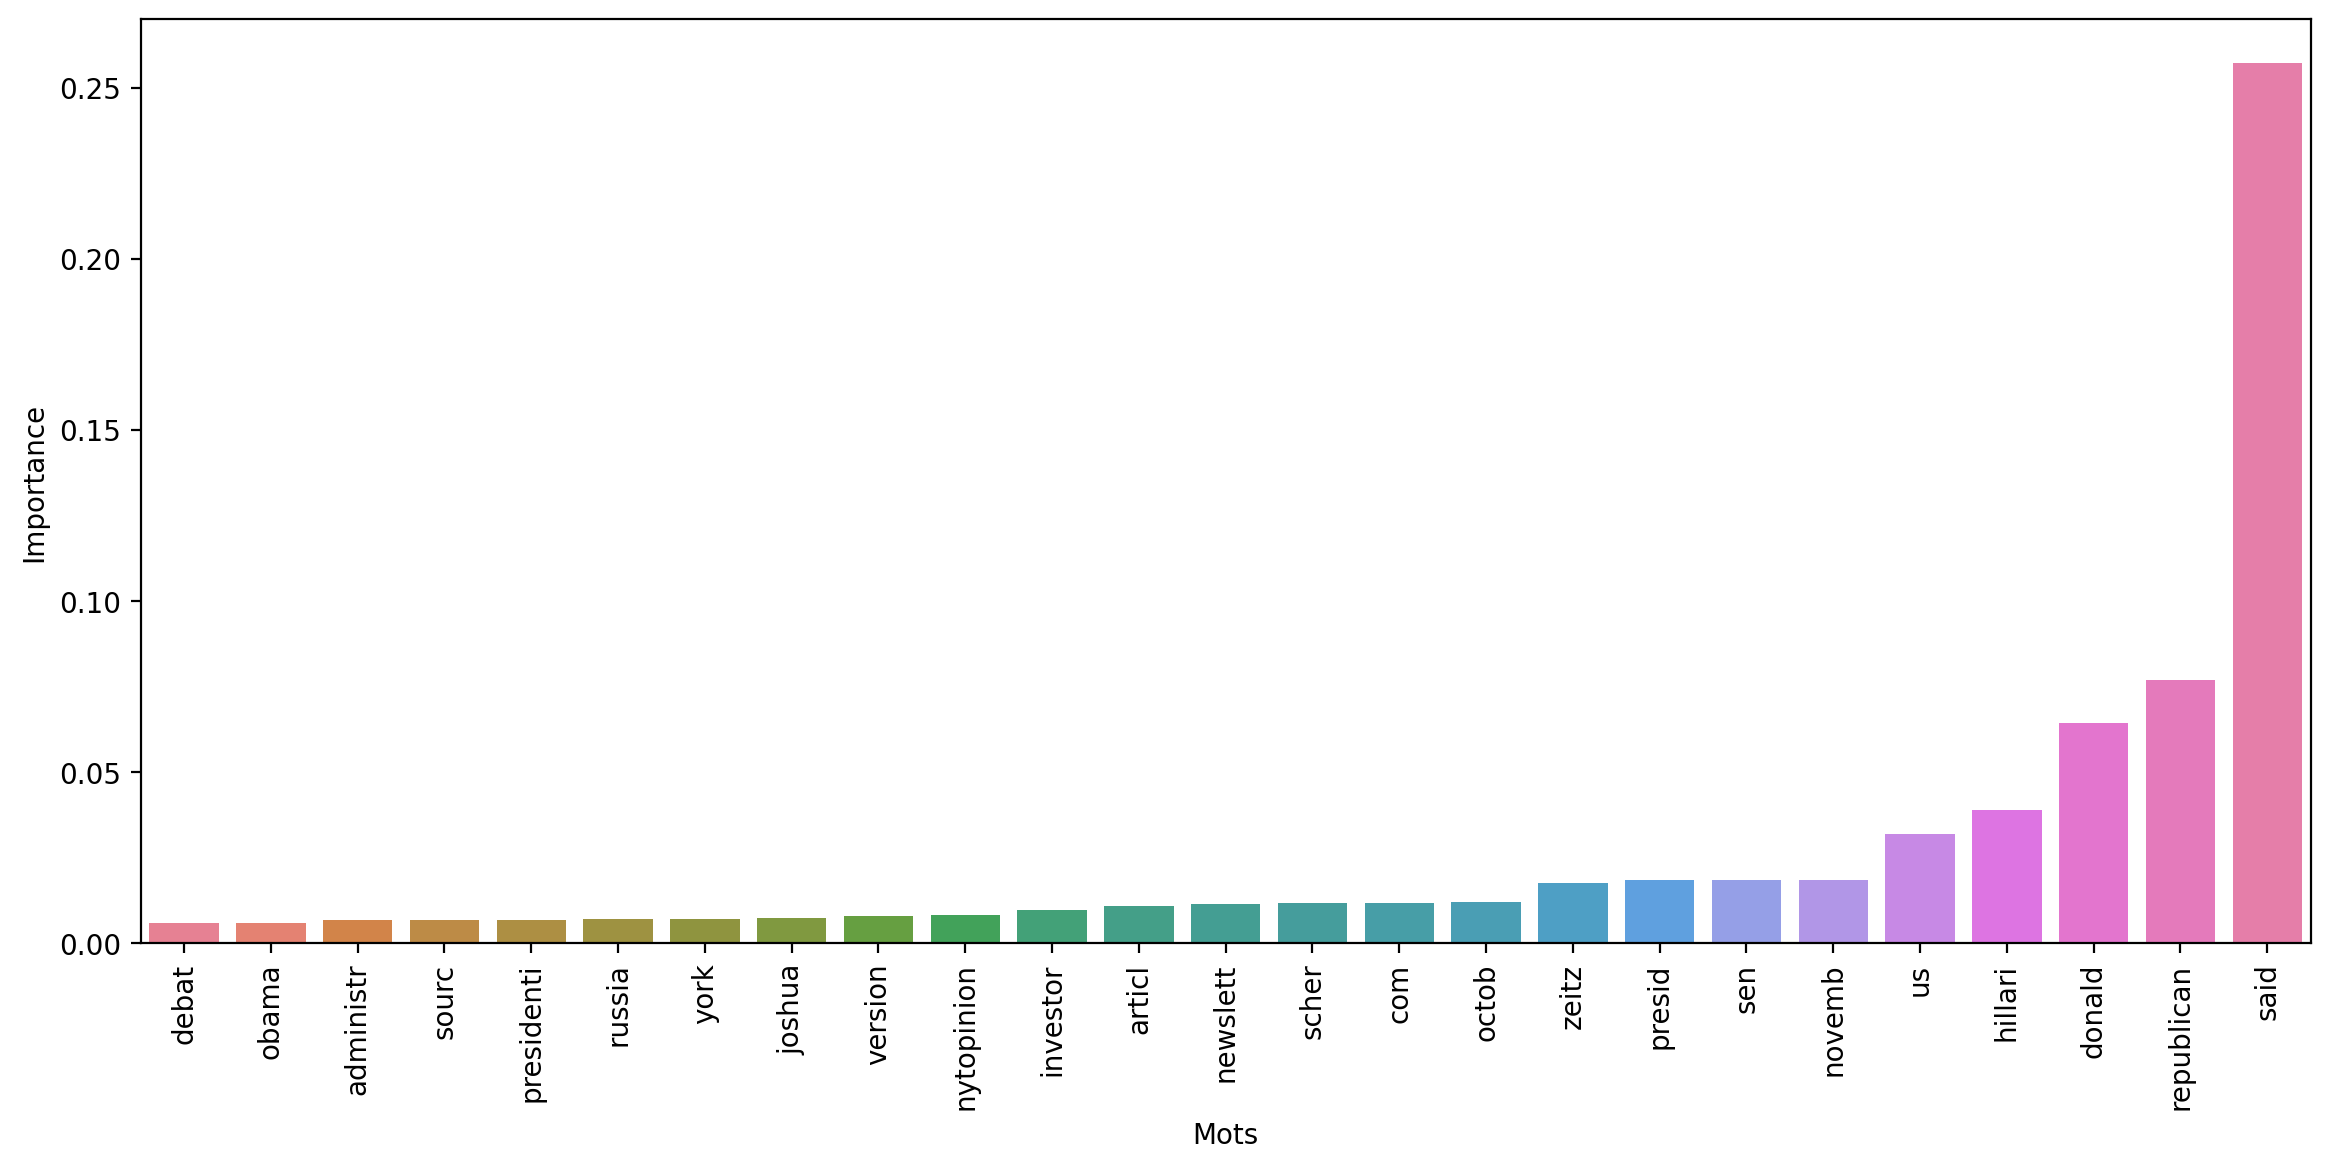

In [32]:
plt.figure(figsize=(14,6), dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'), x=imp_feats.sort_values('Importance').index, y='Importance', hue=imp_feats.sort_values('Importance').index)
plt.xticks(rotation=90)
plt.xlabel('Mots');

Nous observons que le mot 'said' est la feature la plus importante pour la prise de décision du modèle, soit celle qui a le plus d'influence sur les prédictions. 

# Benchmark des métriques

## Accuracy train versus test

Comparons les métriques d'accuracy de chaque modèle ayant été stocké comme le meilleur estimateur par les GridSearch, lors de l'entraînement par grille et lors du test sur l'ensemble "hold-out", ce qui nous permettra de visualiser les pertes, sur- et sous-ajustements.

In [9]:
# tableau comparatif des métriques d'accuracy train versus test
df_benchmark = pd.DataFrame({
    'Meilleur estimateur': ['Naive Bayes', 'Random Forest', 'SVM', 'Logistic Regression', 'Passive Aggressive', 'AdaBoost', 'Gradient Boosting'],
    'Accuracy train': [.89986, .89921, .93649, .93649, .93759, .87827, .91904],
    'Accuracy test': [.90129, .90181, .93618, .93669, .93695, .87881, .92300]
})
df_benchmark

Meilleur estimateur  Accuracy train  Accuracy test
0          Naive Bayes         0.89986        0.90129
1        Random Forest         0.89921        0.90181
2                  SVM         0.93649        0.93618
3  Logistic Regression         0.93649        0.93669
4   Passive Aggressive         0.93759        0.93695
5             AdaBoost         0.87827        0.87881
6    Gradient Boosting         0.91904        0.92300

In [12]:
# graphique
df_melted = df_benchmark.melt(id_vars='Meilleur estimateur', var_name='Métrique', value_name='Valeur')
pio.templates.default = 'plotly_white'
fig = px.bar(df_melted, x='Meilleur estimateur', y='Valeur', color='Métrique', barmode='group', text='Valeur',
             color_discrete_map={'Accuracy train': 'lightyellow', 'Accuracy test': 'lightgrey'},
             title='Accuracy train versus test des meilleurs estimateurs', labels={'Meilleur estimateur': 'Estimateur', 'Valeur': 'Valeur'})
fig.update_layout(yaxis_showgrid=False, xaxis_tickangle=-45, xaxis_title='Estimateur', yaxis_title='Valeur', yaxis_range=[0.85, 0.94], legend_title='Métrique')
fig.show()

Ce graphique nous permet d'observer la qualité de généralisation à l'ensemble test "hold-out" de chacun des modèles, indépendamment de la valeur de leur accuracy. Ce résultat souligne la pertinence de l'utilisation d'une recherche par GridSearchCV. Les modèles SVM, régression logistique et passif-agressif ont non seulement les performances les plus importantes, mais sont également robustes.

## Métriques de test

Réalisons à présent un comparatif des métriques de chaque meilleur estimateur. Nous retiendrons 4 métriques:
- Accuracy (exactitude) : nombre total de prédictions correctes par rapport au nombre total d'observations. Elle mesure la proportion totale de prédictions correctes du modèle.
- Precision (précision) : nombre de prédictions correctes pour une classe par rapport au nombre total de prédictions pour cette classe. En d'autres termes, c'est la capacité du modèle à ne pas étiqueter à tort une observation comme appartenant à cette classe. Une précision élevée indique que le modèle a moins d'erreurs de faux positifs.
- Recall (rappel) : nombre de prédictions correctes pour une classe donnée sur le nombre total d'observations appartenant réellement à cette classe. En d'autres termes, c'est la capacité du modèle à identifier correctement les occurrences positives. Un rappel élevé indique que le modèle a moins d'erreurs de faux négatifs.
- F1-score (score F1) : moyenne pondérée de la précision et du rappel. Il est utilisé comme métrique d'évaluation lorsque les classes sont déséquilibrées.

Il est à noter que les métriques retenues dans le benchmark sont celles calculées à partir de la moyenne pondérée (weighted average).

In [13]:
# tableau comparatif des métriques de test
df_benchmark = pd.DataFrame({
    'Meilleur estimateur': ['Naive Bayes', 'Random Forest', 'SVM', 'Logistic Regression', 'Passive Aggressive', 'AdaBoost', 'Gradient Boosting'],
    'Accuracy': [.90129, .90181, .93618, .93669, .93695, .87881, .92300],
    'Précision': [.90128, .90319, .93643, .93675, .93705, .88176, .92383],
    'Recall': [.90129, .90181, .93618, .93669, .93695, .87881, .92300],
    'F1-Score': [.90128, .90096, .93594, .93653, .93677, .87717, .92252]
})
df_benchmark

Meilleur estimateur  Accuracy  Précision   Recall  F1-Score
0          Naive Bayes   0.90129    0.90128  0.90129   0.90128
1        Random Forest   0.90181    0.90319  0.90181   0.90096
2                  SVM   0.93618    0.93643  0.93618   0.93594
3  Logistic Regression   0.93669    0.93675  0.93669   0.93653
4   Passive Aggressive   0.93695    0.93705  0.93695   0.93677
5             AdaBoost   0.87881    0.88176  0.87881   0.87717
6    Gradient Boosting   0.92300    0.92383  0.92300   0.92252

In [15]:
# graphique
df_melted = df_benchmark.melt(id_vars='Meilleur estimateur', var_name='Métrique', value_name='Valeur')
pio.templates.default = 'plotly_white'
fig = px.bar(df_melted, x='Meilleur estimateur', y='Valeur', color='Métrique', barmode='group', text='Valeur',
             color_discrete_map={'Accuracy': 'lightyellow', 'Précision': 'lightgrey', 'Recall': 'grey', 'F1-Score': 'yellow'},
             title='Performances de test des meilleurs estimateurs', labels={'Meilleur estimateur': 'Estimateur', 'Valeur': 'Valeur'})
fig.update_layout(yaxis_showgrid=False, xaxis_tickangle=-45, xaxis_title='Estimateur', yaxis_title='Valeur', yaxis_range=[0.85, 0.94], legend_title='Métrique')
fig.show()

Nous voyons que les meilleures performances se situent au niveau des estimateurs SVM, Logistic Regression et Passive-Aggressive, avec une légère supériorité pour le modèle Passive-Aggressive. Ce sont ces 3 modèles que nous retiendrons pour un test "en production".

# Sauvegarde des meilleurs estimateurs

In [46]:
# exportation des modèles dans un fichier
dump(best_svm, 'model_svm.joblib')
dump(best_lr, 'model_lr.joblib')
dump(best_pa, 'model_pa.joblib')

['model_pa.joblib']

In [47]:
# importation des modèles sauvegardés
model_svm = load('model_svm.joblib')
model_lr = load('model_lr.joblib')
model_pa = load('model_pa.joblib')

# Test sur de nouvelles données

Pour tester nos 3 meilleurs estimateurs "en production", nous allons nous baser sur des données non vues, scrapées sur le site de deux journaux américains:
- Les données Fake ont été scrapées sur le site du journal satirique américain The Onion.
- Les données Real ont été scrapées sur le site du journal américain Time Magazine.

Le notebook 'scraping' contient la méthodologie utilisée pour le scraping à l'aide de la librairie Python BeautifulSoup.

In [55]:
# récupération des df scrapés
df_new_fake = pd.read_csv('data_new_fake_theonion.csv', usecols=['articles'])
df_new_real = pd.read_csv('data_new_real_time.csv', usecols=['articles'])

In [63]:
# ajout d'une colonne de labels
df_new_fake['label'] = 0
df_new_real['label'] = 1

In [61]:
# vérifications
df_new_fake.head()

articles  label
0  DAYTON, OH—While greeting the crowd at a campa...      0
1  Presidential candidate Donald Trump recently r...      0
2  And the RNC is going to pay for it. It probabl...      0
3  VANDALIA, OH—Drawing criticism for what many c...      0
4  WASHINGTON—Her mind spinning as she poured ove...      0

In [62]:
df_new_fake.shape

(1710, 2)

In [64]:
df_new_real.head()

articles  label
0  This article is part of The D.C. Brief, TIME’s...      1
1  House Republicans are preparing to sign articl...      1
2  Donald Trump has a way of ducking trouble. Spe...      1
3  As President Joe Biden and his national securi...      1
4  (WASHINGTON) — President Joe Biden cut short a...      1

In [65]:
df_new_real.shape

(1981, 2)

In [66]:
# concaténation
df_new = pd.concat([df_new_fake, df_new_real], ignore_index=True)

In [67]:
df_new.head()

articles  label
0  DAYTON, OH—While greeting the crowd at a campa...      0
1  Presidential candidate Donald Trump recently r...      0
2  And the RNC is going to pay for it. It probabl...      0
3  VANDALIA, OH—Drawing criticism for what many c...      0
4  WASHINGTON—Her mind spinning as she poured ove...      0

In [68]:
df_new.shape

(3691, 2)

In [71]:
# pré-processing avec la fonction préalablement implémentée
df_new['preprocessed_text'] = df_new['articles'].apply(preprocess_text)

In [72]:
# préparation
X_new = df_new['preprocessed_text']
X_new

0       dayton oh greet crowd campaign ralli thursday ...
1       presidenti candid donald trump recent remark l...
2       rnc go pay probabl work worth shot week lara b...
3       vandalia oh draw critic mani call dehuman hurt...
4       washington mind spin pour sheaf paper vice pre...
                              ...                        
3686    florida legisl propos ban abort state allow la...
3687    presid joe biden stood front icon green marbl ...
3688    articl part dc brief time polit newslett sign ...
3689    presid joe biden remark unit nation general as...
3690    texa controversi six week abort banha effect d...
Name: preprocessed_text, Length: 3691, dtype: object

In [79]:
y_new = df_new['label']
y_new

0       0
1       0
2       0
3       0
4       0
       ..
3686    1
3687    1
3688    1
3689    1
3690    1
Name: label, Length: 3691, dtype: int64

In [73]:
# TF-IDF
X_new = tfidf_vectorizer.transform(X_new)
X_new

<3691x80599 sparse matrix of type '<class 'numpy.float64'>'
	with 902885 stored elements in Compressed Sparse Row format>

In [75]:
# prédictions
predictions_svm = model_svm.predict(X_new)
predictions_lr = model_lr.predict(X_new)
predictions_pa = model_pa.predict(X_new)

In [78]:
# vérification de la longueur des prédictions pour chaque modèle
print(len(predictions_svm), len(predictions_lr), len(predictions_pa))

3691 3691 3691


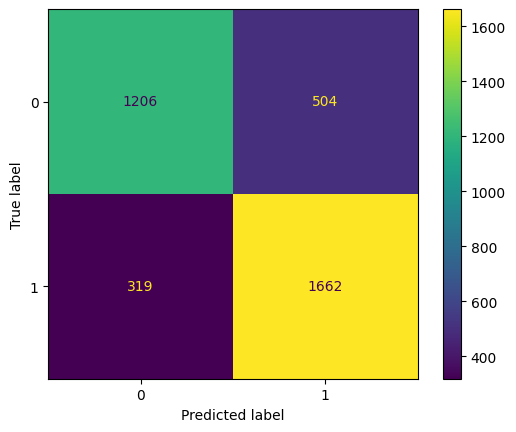

In [80]:
# évaluation SVM
ConfusionMatrixDisplay.from_estimator(model_svm, X_new, y_new);

In [81]:
print(classification_report(y_new, predictions_svm, digits=5))

              precision    recall  f1-score   support

           0    0.79082   0.70526   0.74560      1710
           1    0.76731   0.83897   0.80154      1981

    accuracy                        0.77703      3691
   macro avg    0.77907   0.77212   0.77357      3691
weighted avg    0.77820   0.77703   0.77562      3691



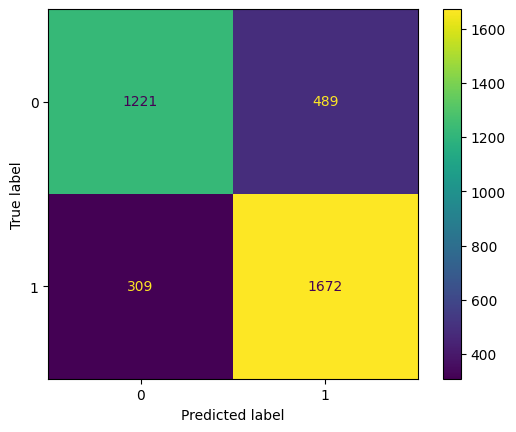

In [82]:
# évaluation régression logistique
ConfusionMatrixDisplay.from_estimator(model_lr, X_new, y_new);

In [83]:
print(classification_report(y_new, predictions_lr, digits=5))

              precision    recall  f1-score   support

           0    0.79804   0.71404   0.75370      1710
           1    0.77372   0.84402   0.80734      1981

    accuracy                        0.78380      3691
   macro avg    0.78588   0.77903   0.78052      3691
weighted avg    0.78498   0.78380   0.78249      3691



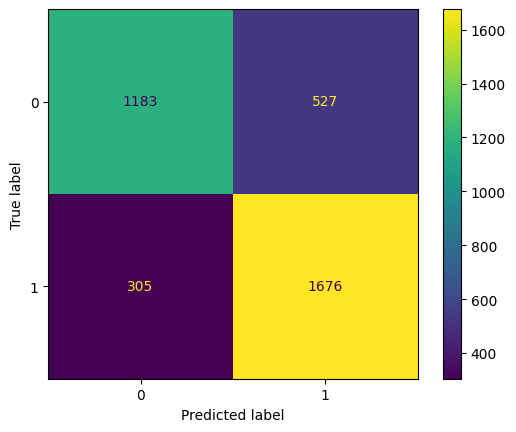

In [84]:
# évaluation passif-agressif
ConfusionMatrixDisplay.from_estimator(model_pa, X_new, y_new);

In [85]:
print(classification_report(y_new, predictions_pa, digits=5))

              precision    recall  f1-score   support

           0    0.79503   0.69181   0.73984      1710
           1    0.76078   0.84604   0.80115      1981

    accuracy                        0.77459      3691
   macro avg    0.77790   0.76893   0.77049      3691
weighted avg    0.77665   0.77459   0.77274      3691



## Benchmark des métriques sur les données inédites

In [26]:
# tableau comparatif des métriques des 3 modèles sur l'ensemble inédit
df_final_eval_1 = pd.DataFrame({
    'Estimateurs finaux': ['SVM', 'Logistic Regression', 'Passive Aggressive'],
    'Accuracy': [.77703, .78380, .77459],
    'Précision': [.77820, .78498, .77665],
    'Recall': [.77703, .78380, .77459],
    'F1-Score': [.77562, .78249, .77274]
})
df_final_eval_1

Estimateurs finaux  Accuracy  Précision   Recall  F1-Score
0                  SVM   0.77703    0.77820  0.77703   0.77562
1  Logistic Regression   0.78380    0.78498  0.78380   0.78249
2   Passive Aggressive   0.77459    0.77665  0.77459   0.77274

In [28]:
# graphique
df_melted = df_final_eval_1.melt(id_vars='Estimateurs finaux', var_name='Métrique', value_name='Valeur')
pio.templates.default = 'plotly_white'
fig = px.bar(df_melted, x='Estimateurs finaux', y='Valeur', color='Métrique', barmode='group', text='Valeur',
             color_discrete_map={'Accuracy': 'lightyellow', 'Précision': 'lightgrey', 'Recall': 'grey', 'F1-Score': 'yellow'},
             title='Comparaison des performances des 3 modèles sur les données inédites',
             labels={'Estimateurs finaux': 'Estimateur', 'Valeur': 'Valeur'})
fig.update_layout(yaxis_showgrid=False, xaxis_tickangle=-45, xaxis_title='Estimateur final', yaxis_title='Valeur', yaxis_range=[0.77, 0.785], legend_title='Métrique')
fig.show()

## Benchmark des performances comparées entre données test et données inédites

In [23]:
# tableau comparatif des performances des 3 modèles sur l'ensemble test et l'ensemble inédit
df_final_eval_2 = pd.DataFrame({
    'Estimateurs finaux': ['SVM', 'Logistic Regression', 'Passive Aggressive'],
    'Accuracy dataset test': [.93618, .93669, .93695],
    'Accuracy dataset inédit': [.77703, .78380, .77459]
})
df_final_eval_2

Estimateurs finaux  Accuracy dataset test  Accuracy dataset inédit
0                  SVM                0.93618                  0.77703
1  Logistic Regression                0.93669                  0.78380
2   Passive Aggressive                0.93695                  0.77459

In [25]:
# graphique
df_melted = df_final_eval_2.melt(id_vars='Estimateurs finaux', var_name='Accuracy', value_name='Valeur')
pio.templates.default = 'plotly_white'
fig = px.bar(df_melted, x='Estimateurs finaux', y='Valeur', color='Accuracy', barmode='group', text='Valeur',
             color_discrete_map={'Accuracy dataset test': 'lightyellow', 'Accuracy dataset inédit': 'lightgrey'},
             title='Comparaison des performances des 3 modèles sur les données test versus inédites', labels={'Estimateurs finaux': 'Estimateurs finaux', 'Valeur': 'Valeur'})
fig.update_layout(yaxis_showgrid=False, xaxis_tickangle=-45, xaxis_title='Estimateur final', yaxis_title='Valeur', yaxis_range=[0.70, 0.94], legend_title='Métrique')
fig.show()

Nous remarquons que pour les trois estimateurs, on relève toujours plus de faux positifs (c'est-à-dire de cas où les modèles prédisent la classe Real=1 alors que l'étiquette réelle est Fake=0), que de faux négatifs (l'inverse). En d'autres mots, les modèles peinent davantage à reconnaître les articles Fake et à les classer comme tels lorsqu'ils le sont. Ce résultat ne peut pas s'expliquer par le déséquilibre de nos classes qui est en faveur d'une plus grande proportion de Fake (si cela était imputable au déséquilibre, le modèle produirait plus de faux négatifs). Une autre remarque est que l'accuracy pour les trois estimateurs est moindre que pour l'évaluation (avec une perte moyenne de 15 points d'accuracy). Cela suggère un surajustement des modèles aux données d'entraînement, qui peut s'expliquer par un modèle devenu trop complexe pour généraliser aux nouvelles données scrapées.

# Discussion

Dans ce premier notebook, nous avons procédé aux étapes suivantes : 
- Data cleaning
- EDA
- Data linguistic pre-processing
- TF-IDF vectorizing
- Machine learning models + benchmark
- Scraped new data testing

Les meilleurs estimateurs retenus sont ceux qui ont présenté les meilleures métriques après optimisation par grid search, à savoir les modèles SVM, régression logistique et passif-agressif. Le test sur les nouvelles données "en production" a révélé que le modèle de régression logistique était le plus robuste, car le plus en capacité de généraliser sur ces nouvelles données, à 0.01 près toutefois par rapport aux deux autres. Les 3 modèles présentent une perte de 15 points en accuracy par rapport à l'évaluation sur le dataset de test ; les 3 modèles présentent également une tendance à produire davantage de faux positifs que de faux négatifs. Pour interpréter ces résultats, nous avons rejeté plus haut une imputation au déséquilibre dans nos données (nous rappelons que le dataset de départ présente plus de fake que de real), mais nous allons principalement discuter 3 éléments à ce stade:
1. Remarques à propos du data cleaning : notre travail a présenté deux phases de cleaning, une première phase avec un premier cleaning, et une deuxième phase avec un cleaning plus approfondi (suppression des adresses mails, de certains acronymes privés de sens, de certaines fins de phrases non informatives, toute la ponctuation et les chiffres). Ce nouveau traitement nous a fait constater une légère baisse dans la performance des modèles (de l'ordre de 0.01). Cependant, ce pré-traitement supplémentaire nous a semblé important afin que le modèle n'apprenne pas à reconnaître les articles sur la base de features non pertinentes telles que la présence-absence d'adresses mails, de noms d'auteurs ou de structure spéficiques entre les deux classes. La réduction du bruit peut être considérée comme une forme de régularisation, qui vise à limiter la capacité du modèle à s'ajuster excessivement aux données d'entraînement (en plus de l'ajustement des hyperparamètres). Malgré ces traitements, la perte de 15 points sur les prédictions à partir de données inédites est questionnante. Il est crucial à ce stade de poursuivre nos investigations vers des architectures plus complexes qui seront à même de capturer plus de complexité et de non linéarité dans les données.
2. Remarques à propos de l'utilisation de la méthode TF-IDF comme méthode de vectorisation : cette méthode très utilisée en NLP présente de nombreux avantages, notamment celui de prendre en compte l'intégralité du corpus de données, comparativement à d'autres méthodes, ainsi que sa simplicité et son interprétabilité. Toutefois TF-IDF peut entraîner une forte sparsité des vecteurs surtout si une part de bruit n'a pas été neutralisée lors du pre-process (ce qui est difficile à vérifier lorsque l'on traite des datasets conséquents comme celui-ci). On peut également ajouter que TF-IDF traitant chaque mot de manière indépendante, ne capture pas la sémantique des mots et le contexte des phrases, ce qui l'empêche de prendre du recul dans un contexte plus large. En d'autres termes, on peut dire que TF-IDF traiterait le corpus de manière lexicale plutôt que sémantique. Ces inconvénients peuvent conduire la méthode à perdre certaines informations capitales (la relation entre les mots) mais à en traiter d'autres moins signifiantes, par conséquent cela pourrait expliquer la moindre capacité des modèles basés sur cette méthode, à généraliser à de nouvelles données jamais rencontrées.
3. Remarques à propos de l'utilisation de modèles de Machine Learning classiques : jusqu'ici, nous avons comparé des modèles traditionnels auxquels nous avons donné en entrée la matrice-résultat de TF-IDF. Cette combinaison est intéressante mais peut être limitée en terme d'extractions de features, comparativement à des méthodes d'apprentissage profond qui auront la capacité d'extraire leurs propres caractéristiques à partir de relations non linéaires dans les données. C'est l'objet de la suite de notre travail, qui sera axée sur l'usage de réseaux de neurones profonds, basés ou non sur de l'apprentissage par transfert. Nous comparerons de la même manière chaque approche utilisée.